In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz,plot_tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


In [21]:
lac_2022_df = pd.read_csv("../data/lac_2022_off_clean")
lac_off_df=lac_2022_df.copy()
lac_2022_df.head()

week  OPP  OPP Score  LAC Score   Time  Quarter Location  yards_to_endzone  \
0     1  LVR          0          0  15:00        1   LAC 25                75   
1     1  LVR          0          0  14:45        1   LAC 33                67   
2     1  LVR          0          0  14:07        1   LAC 34                66   
3     1  LVR          0          0  13:24        1   LAC 36                64   
4     1  LVR          0          0  12:50        1   LAC 38                62   

                                              Detail  Down  ...  \
0  Austin Ekeler left tackle for 8 yards (tackle ...     1  ...   
1  Justin Herbert pass complete short right to Ke...     2  ...   
2  Zander Horvath up the middle for 2 yards (tack...     3  ...   
3  Austin Ekeler right tackle for 2 yards (tackle...     1  ...   
4  Justin Herbert pass complete short left to Jos...     2  ...   

   pass_incomplete  pass_yards_tally  intercepted  fumble  punt  \
0                0                 0            0       0     0   
1                0                 0            0       0     0   
2                0                 0            0       0     0   
3                0                 0            0       0     0   
4                0                 9            0       0     0   

   field goal att  sacked  sack_yards  possession_team  team change  
0               0       0           0              LAC            0  
1               0       0           0              LAC            0  
2               0       0           0              LAC            0  
3               0       0           0              LAC            0  
4               0       0           0              LAC            0  

[5 rows x 33 columns]

In [22]:
lac_off_df = lac_2022_df.astype({'LAC Score': 'int8', 'OPP Score': 'int8','Down':'int8','Down':'int8','Quarter': 'int8','OPP':'string','week':'int8','rush_length':'int8','yardage_diff_2_3':'int8','yardage_diff_1_2':'int8','ToGo':'int8','rush_length':'int8','pass_length':'int8','1D_conv_good':'int8','2D_conv_good':'int8','3D_conv_good':'int8','3D_conv_good':'int8','4D_conv_good':'int8','rush_play':'int8','rush_yards_tally':'int8','pass_play':'int8','pass_complete':'int8','pass_incomplete':'int8','pass_yards_tally':'int8','intercepted':'int8','fumble':'int8','punt':'int8','field goal att':'int8','sacked':'int8','sack_yards':'int8','team change':'int8','possession_team':'string','Location':'string','Detail':'string','yards_to_endzone':'int8'})
lac_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   week              1232 non-null   int8  
 1   OPP               1232 non-null   string
 2   OPP Score         1232 non-null   int8  
 3   LAC Score         1232 non-null   int8  
 4   Time              1232 non-null   object
 5   Quarter           1232 non-null   int8  
 6   Location          1232 non-null   string
 7   yards_to_endzone  1232 non-null   int8  
 8   Detail            1232 non-null   string
 9   Down              1232 non-null   int8  
 10  ToGo              1232 non-null   int8  
 11  yardage_diff_1_2  1232 non-null   int8  
 12  yardage_diff_2_3  1232 non-null   int8  
 13  rush_length       1232 non-null   int8  
 14  pass_length       1232 non-null   int8  
 15  1D_conv_good      1232 non-null   int8  
 16  2D_conv_good      1232 non-null   int8  
 17  3D_conv_good  

In [23]:
lac_off_df.head()

week  OPP  OPP Score  LAC Score   Time  Quarter Location  yards_to_endzone  \
0     1  LVR          0          0  15:00        1   LAC 25                75   
1     1  LVR          0          0  14:45        1   LAC 33                67   
2     1  LVR          0          0  14:07        1   LAC 34                66   
3     1  LVR          0          0  13:24        1   LAC 36                64   
4     1  LVR          0          0  12:50        1   LAC 38                62   

                                              Detail  Down  ...  \
0  Austin Ekeler left tackle for 8 yards (tackle ...     1  ...   
1  Justin Herbert pass complete short right to Ke...     2  ...   
2  Zander Horvath up the middle for 2 yards (tack...     3  ...   
3  Austin Ekeler right tackle for 2 yards (tackle...     1  ...   
4  Justin Herbert pass complete short left to Jos...     2  ...   

   pass_incomplete  pass_yards_tally  intercepted  fumble  punt  \
0                0                 0            0       0     0   
1                0                 0            0       0     0   
2                0                 0            0       0     0   
3                0                 0            0       0     0   
4                0                 9            0       0     0   

   field goal att  sacked  sack_yards  possession_team  team change  
0               0       0           0              LAC            0  
1               0       0           0              LAC            0  
2               0       0           0              LAC            0  
3               0       0           0              LAC            0  
4               0       0           0              LAC            0  

[5 rows x 33 columns]

In [24]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(lac_off_df):
    # Filter rows based on column: 'Down'
    lac_off_df = lac_off_df[lac_off_df['Down'] !=4 ]
    # Drop columns: 'team change', 'possession_team' and 10 other columns
    lac_off_df = lac_off_df.drop(columns=['possession_team','OPP','Location','Detail','team change', 'Time','possession_team','intercepted','pass_length','rush_length','pass_complete','pass_incomplete','4D_conv_good', 'rush_play', 'fumble','pass_play','punt','field goal att','yardage_diff_2_3', 'sack_yards', 'sacked', '1D_conv_good', '2D_conv_good'])
    lac_off_df=pd.get_dummies(lac_off_df)
    return lac_off_df

lac_off_df_clean = clean_data(lac_off_df.copy())
lac_off_df_clean.head()

week  OPP Score  LAC Score  Quarter  yards_to_endzone  Down  ToGo  \
0     1          0          0        1                75     1    10   
1     1          0          0        1                67     2     2   
2     1          0          0        1                66     3     1   
3     1          0          0        1                64     1    10   
4     1          0          0        1                62     2     8   

   yardage_diff_1_2  3D_conv_good  rush_yards_tally  pass_yards_tally  
0                 0             0                 8                 0  
1                 8             0                 0                 0  
2                 0             1                 2                 0  
3                 0             0                 2                 0  
4                 2             0                 0                 9

In [25]:
X=lac_off_df_clean.copy()
X.drop("3D_conv_good", axis=1, inplace=True)

X.head()

week  OPP Score  LAC Score  Quarter  yards_to_endzone  Down  ToGo  \
0     1          0          0        1                75     1    10   
1     1          0          0        1                67     2     2   
2     1          0          0        1                66     3     1   
3     1          0          0        1                64     1    10   
4     1          0          0        1                62     2     8   

   yardage_diff_1_2  rush_yards_tally  pass_yards_tally  
0                 0                 8                 0  
1                 8                 0                 0  
2                 0                 2                 0  
3                 0                 2                 0  
4                 2                 0                 9

In [26]:
# Define target vector
y=lac_off_df_clean["3D_conv_good"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int8)

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=617)

In [28]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [29]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create a gradient boosting classifier
gb_model = GradientBoostingClassifier()


In [32]:
# Fitting the model
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [33]:
# Making predictions using the testing data
predictions = gb_model.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0          257           14
Actual 1           14           16

Accuracy Score : 0.9069767441860465
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       0.53      0.53      0.53        30

    accuracy                           0.91       301
   macro avg       0.74      0.74      0.74       301
weighted avg       0.91      0.91      0.91       301



In [36]:
feature_names = list(X.columns)
class_names = list(y_train)

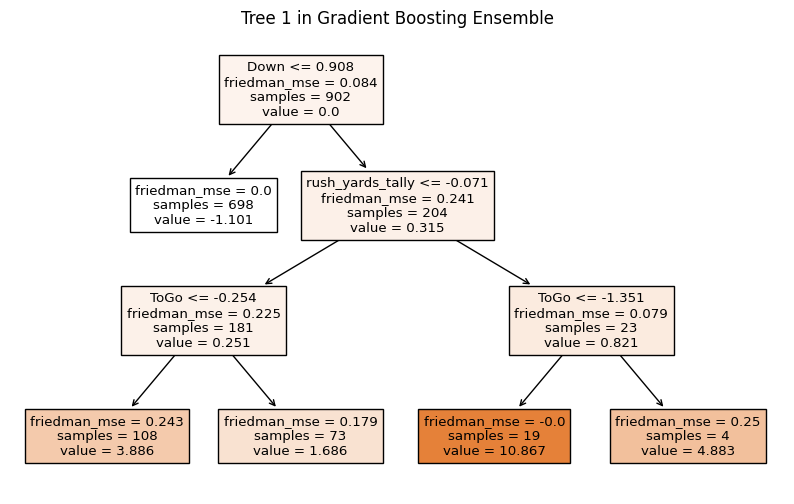

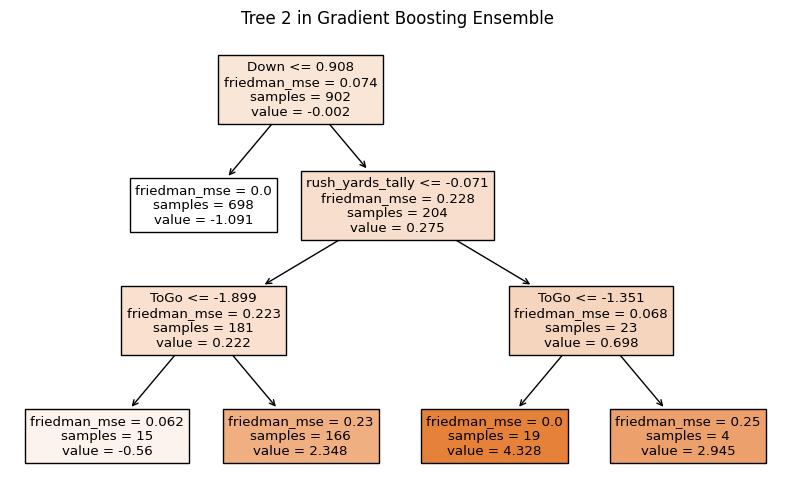

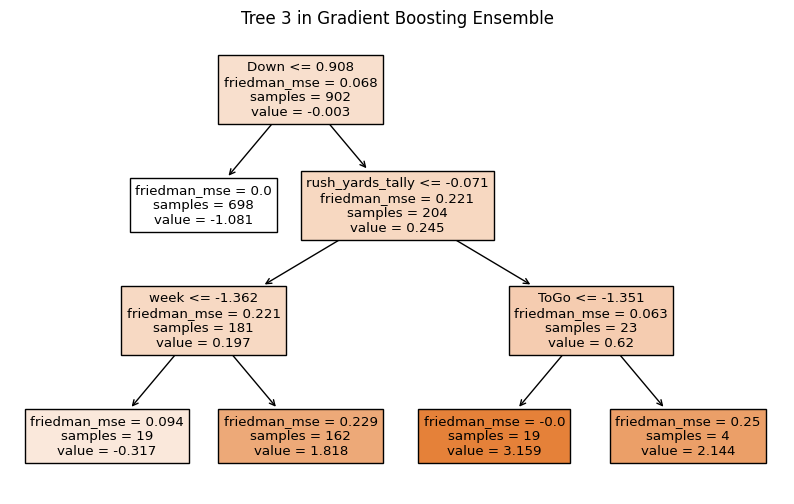

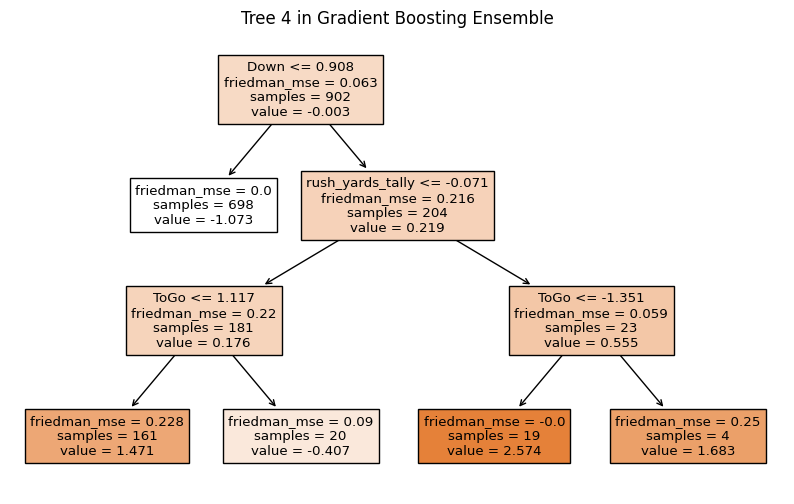

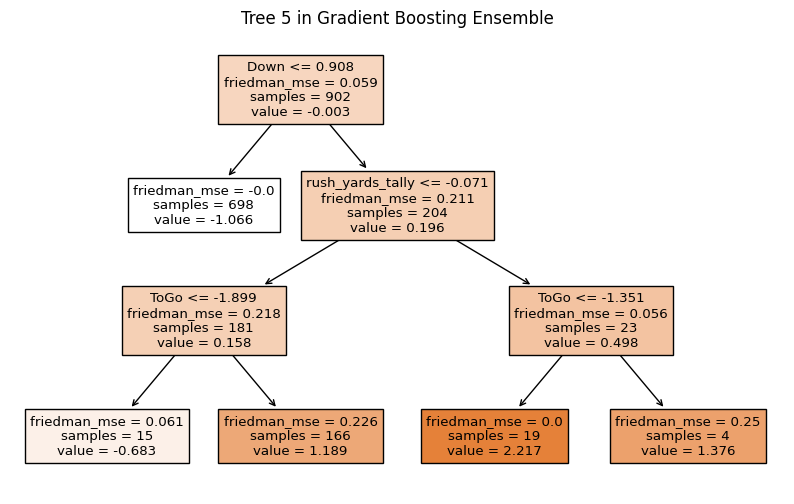

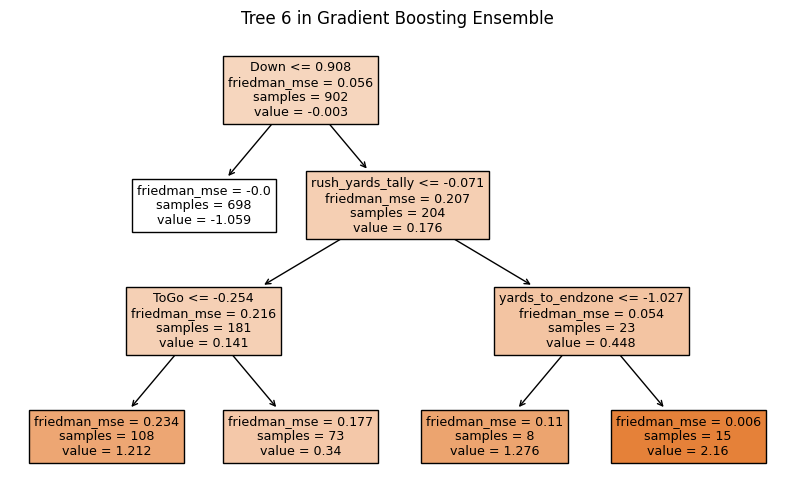

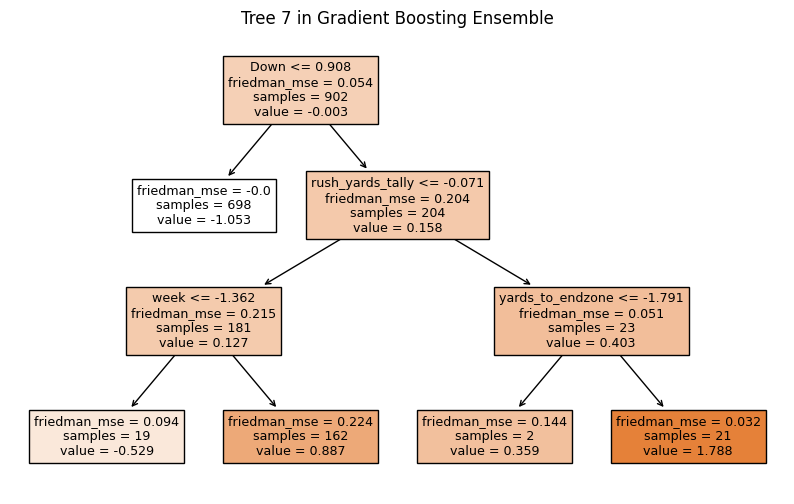

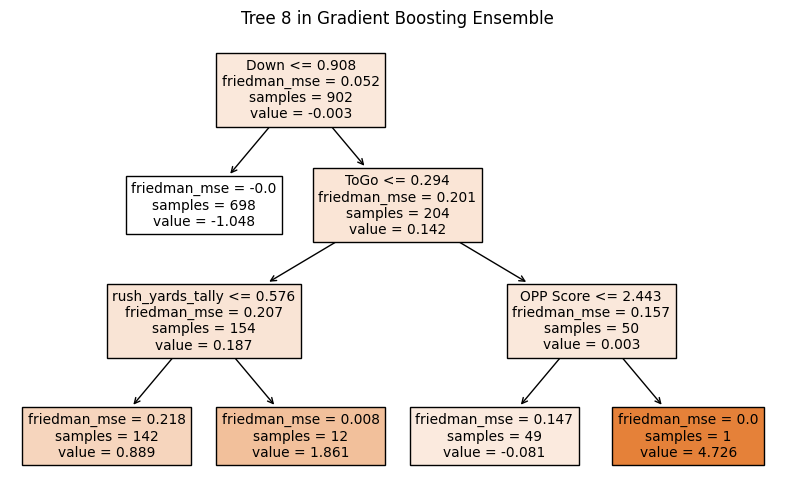

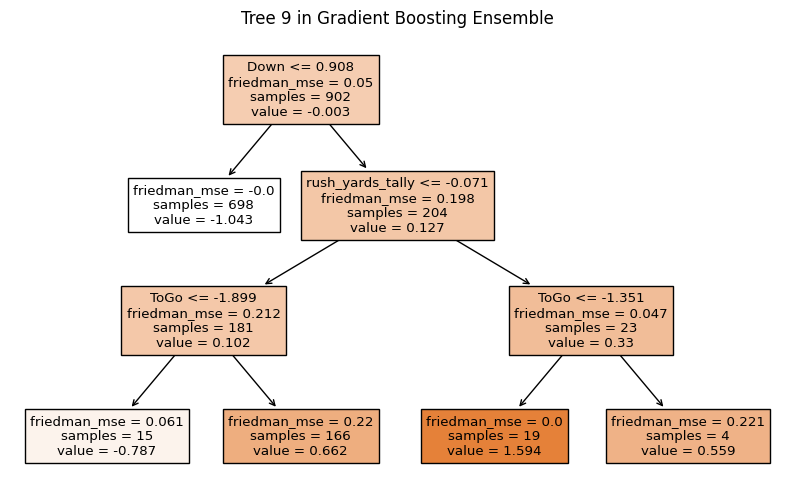

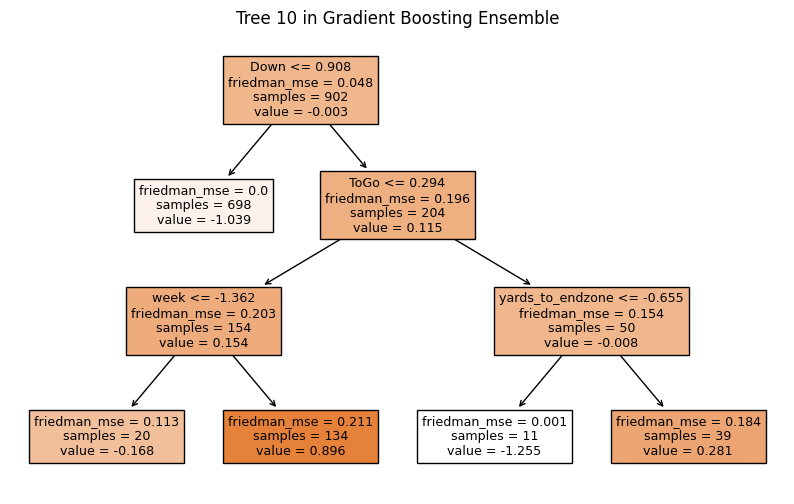

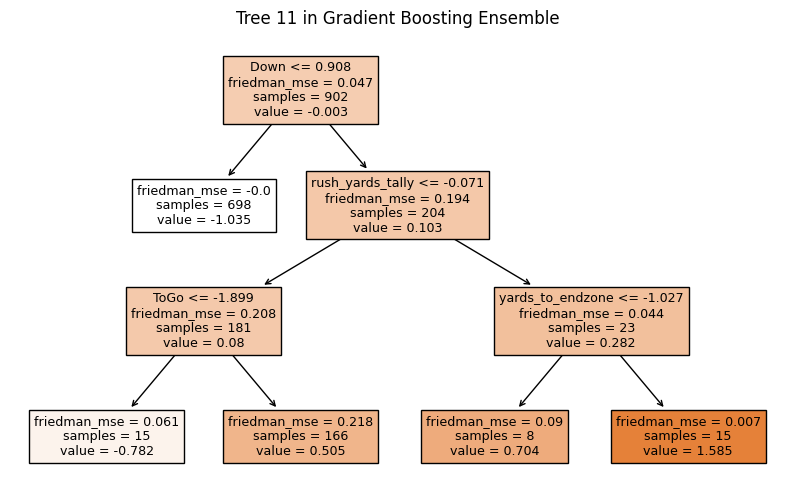

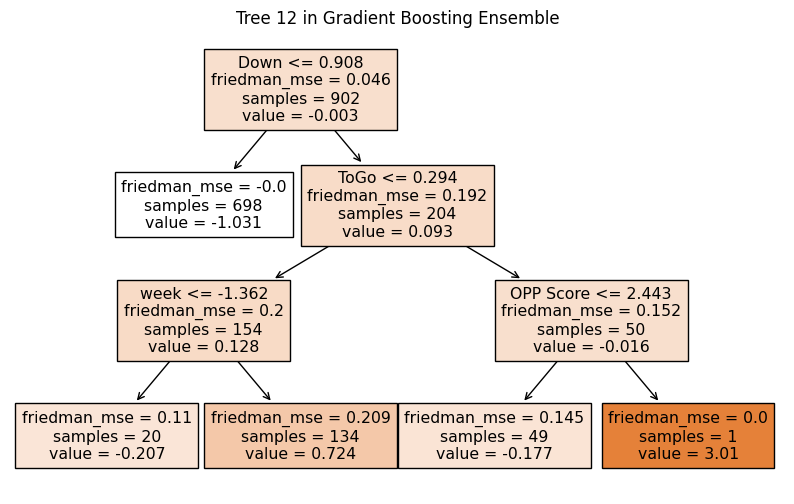

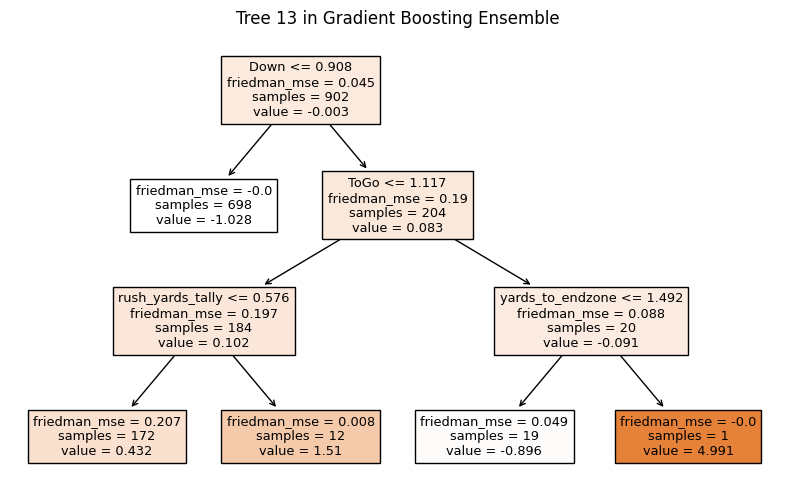

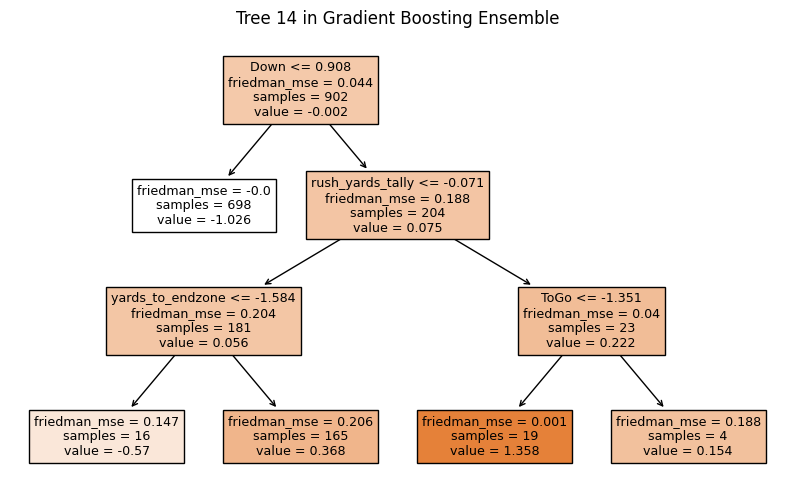

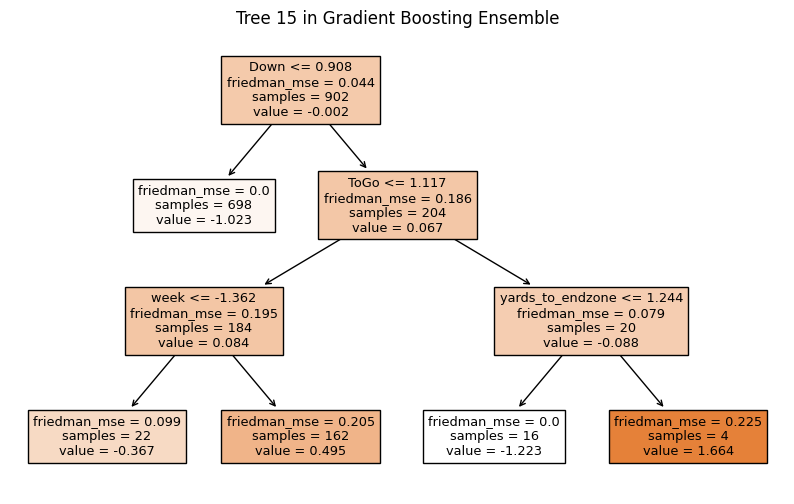

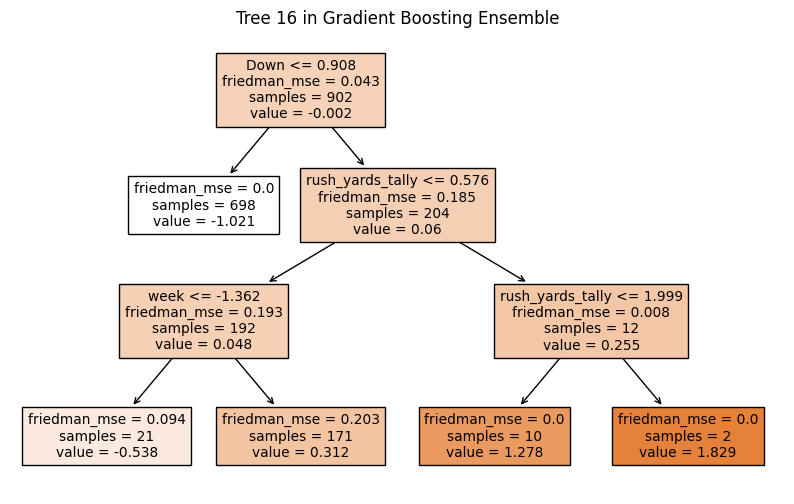

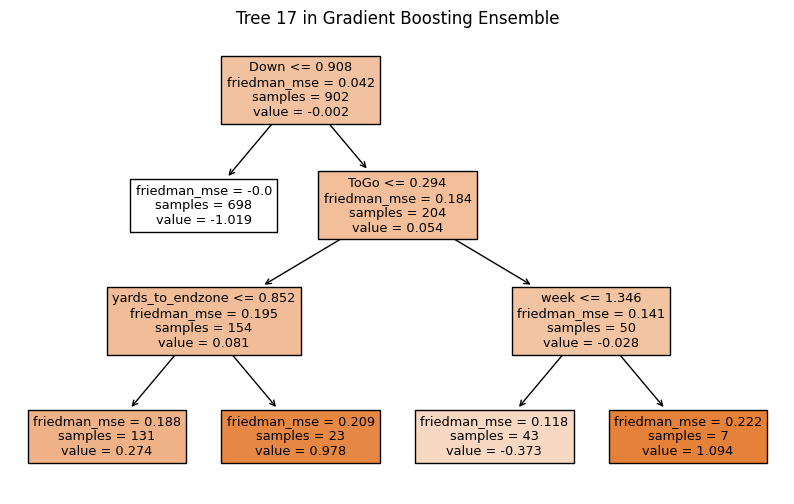

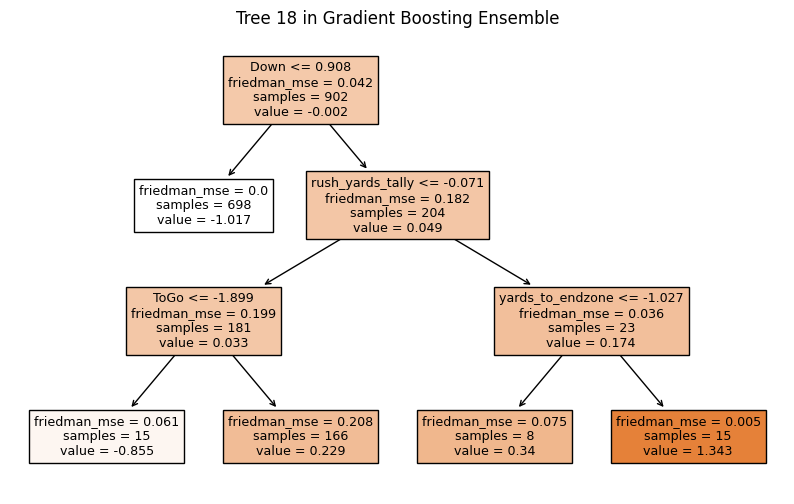

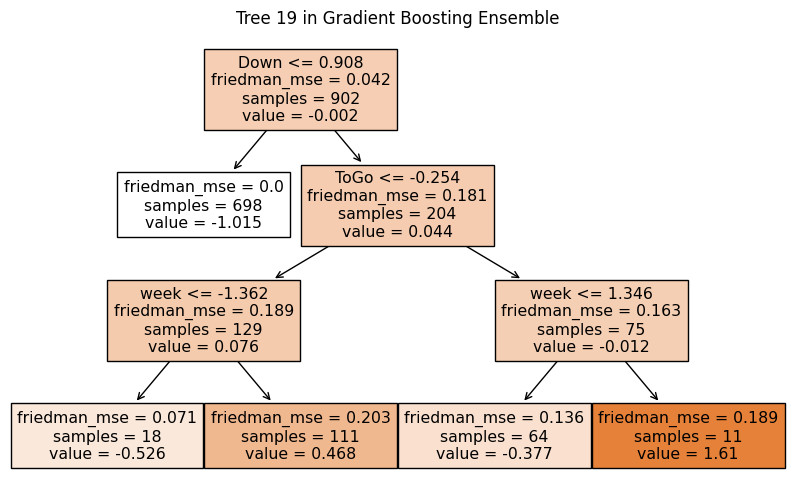

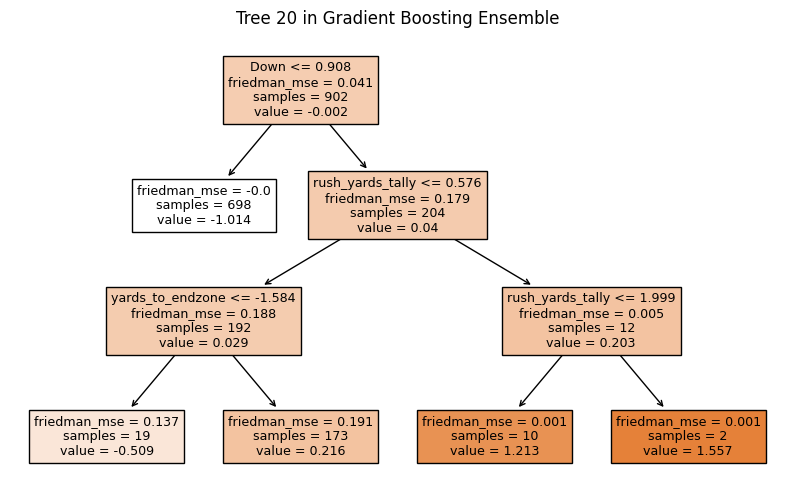

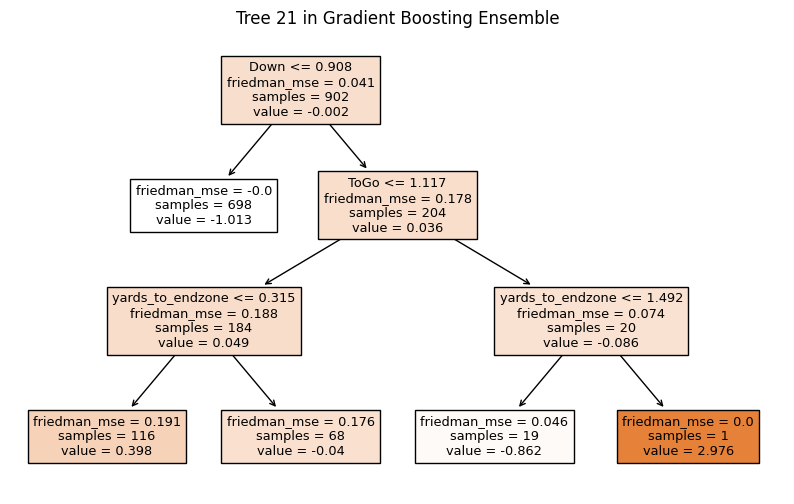

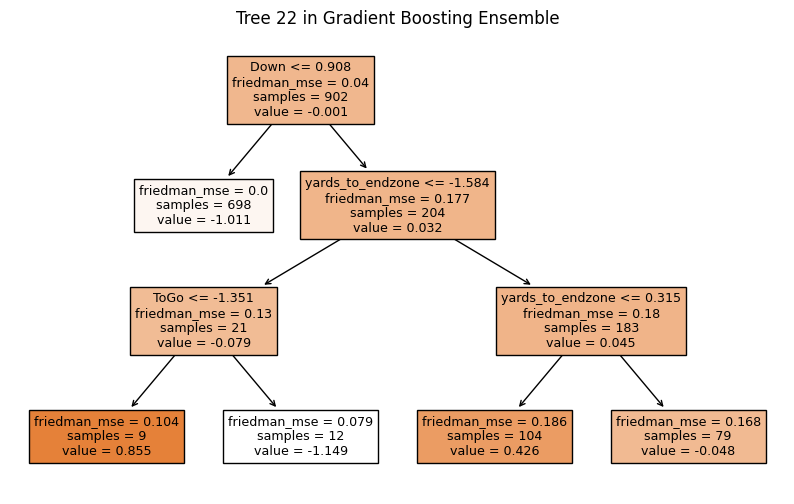

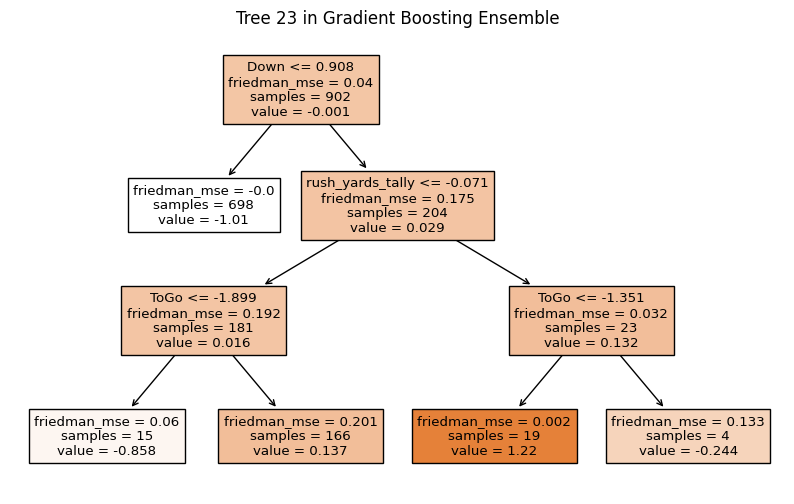

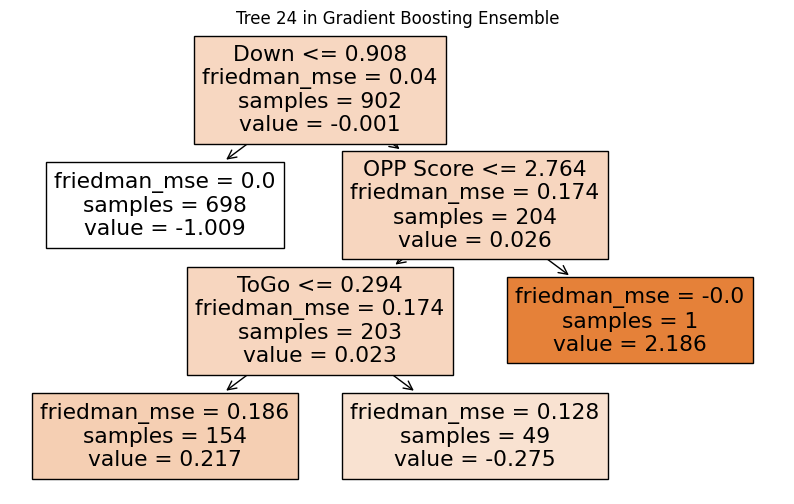

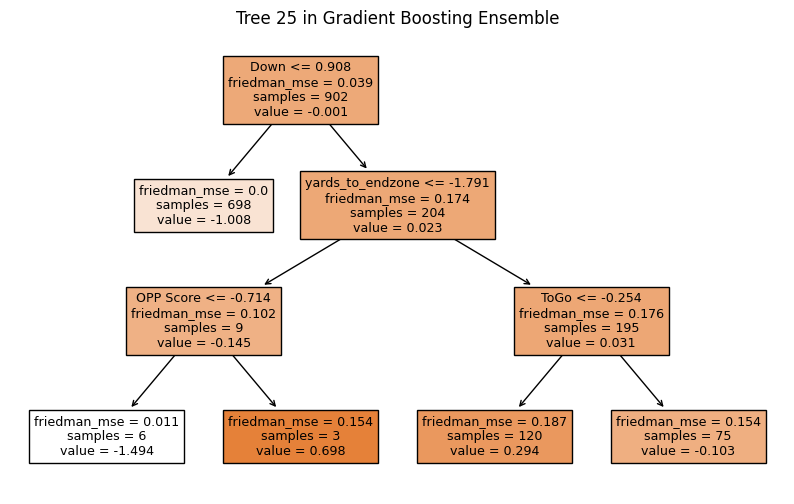

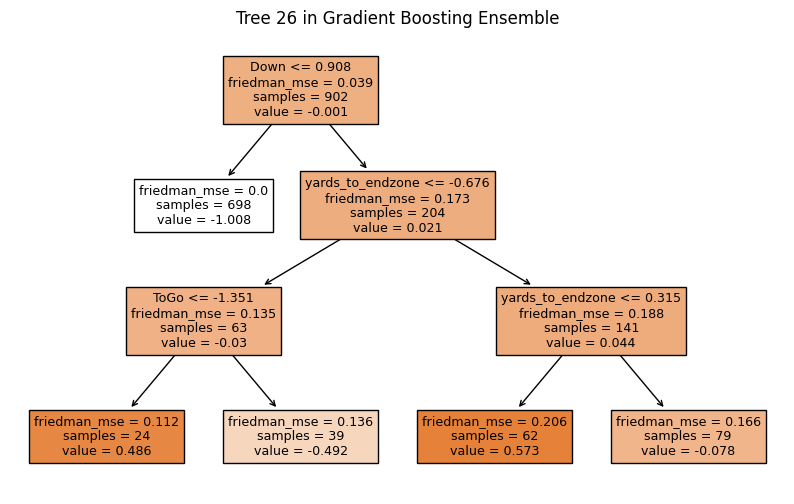

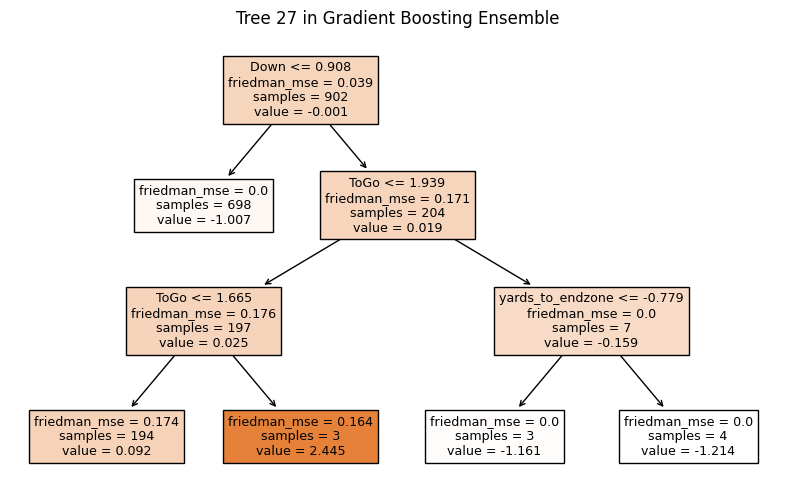

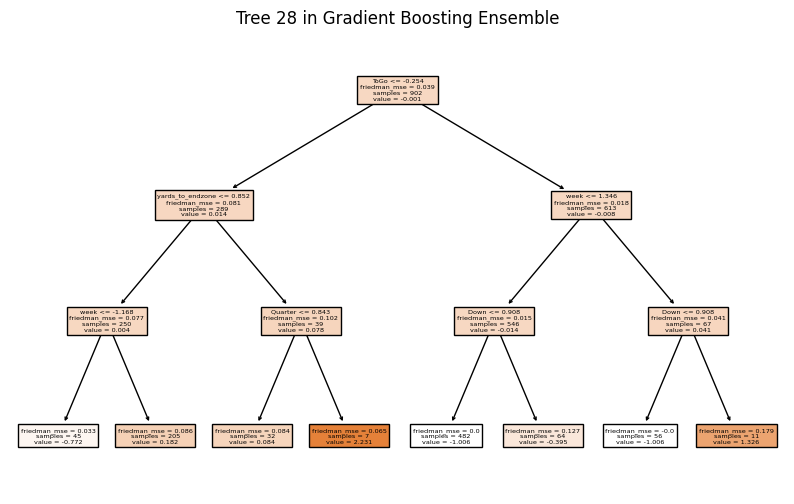

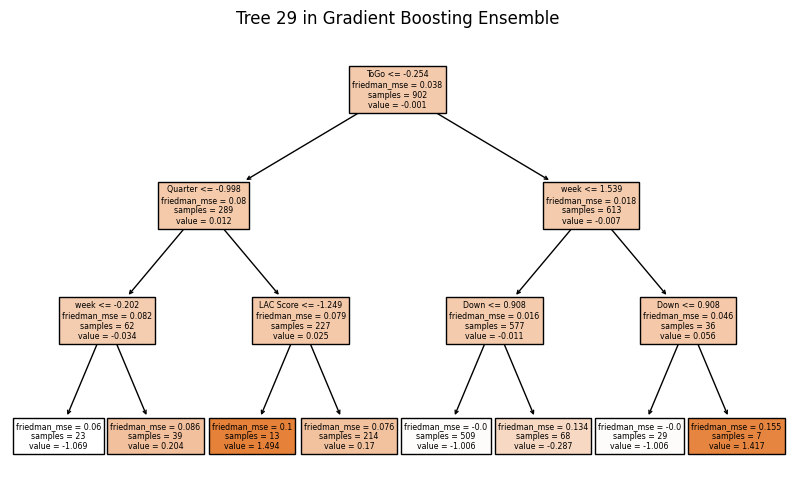

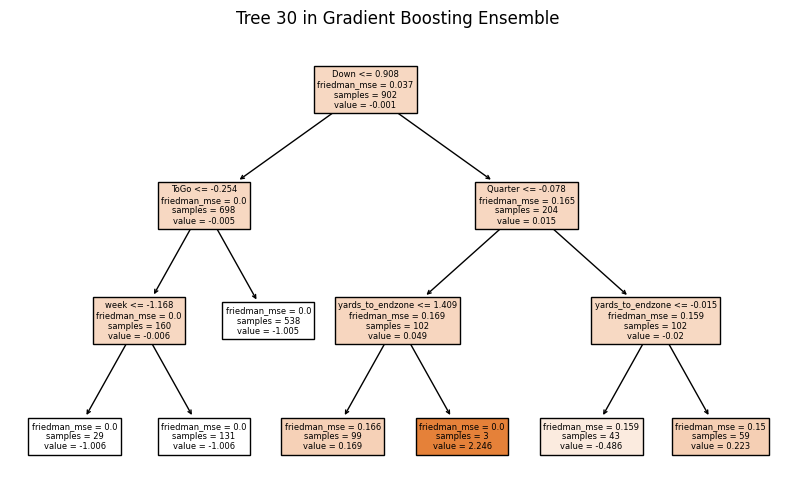

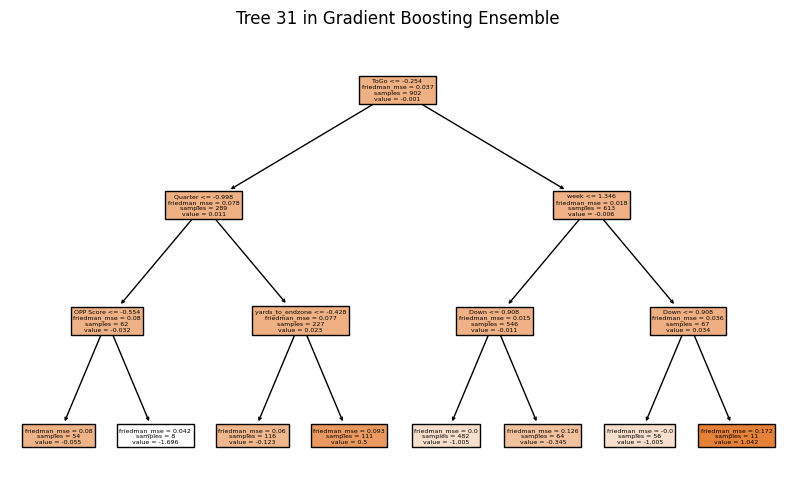

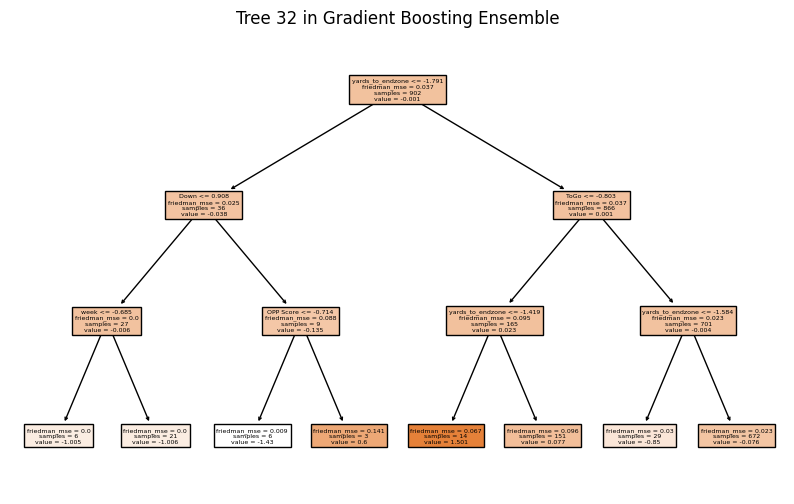

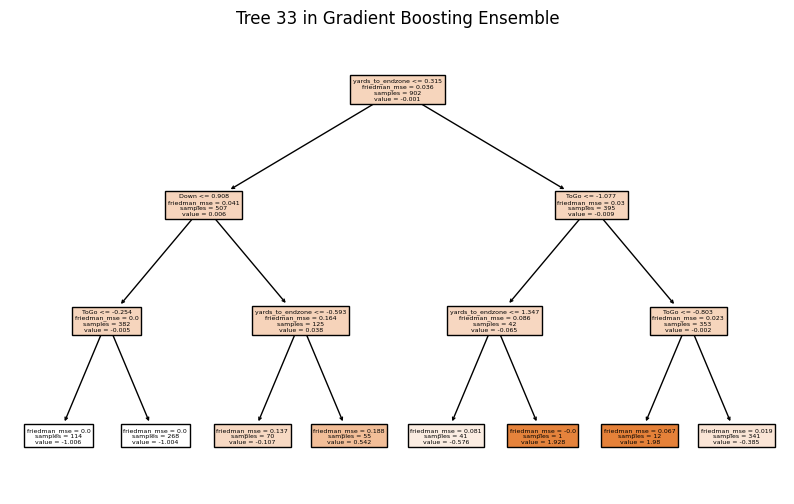

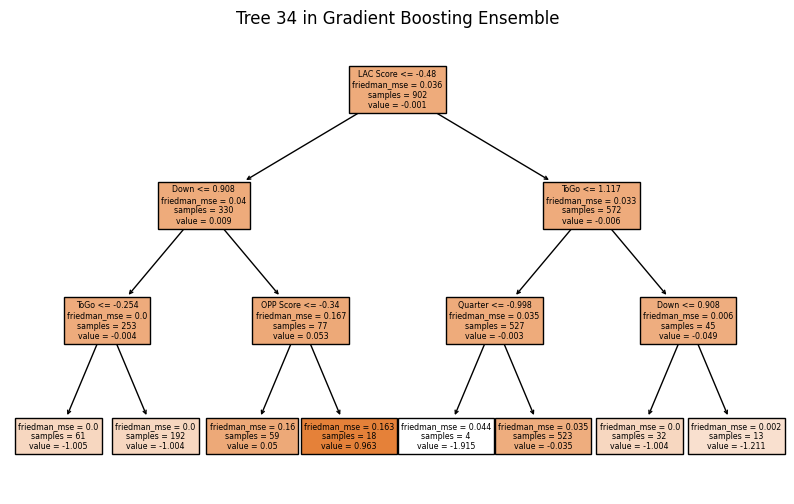

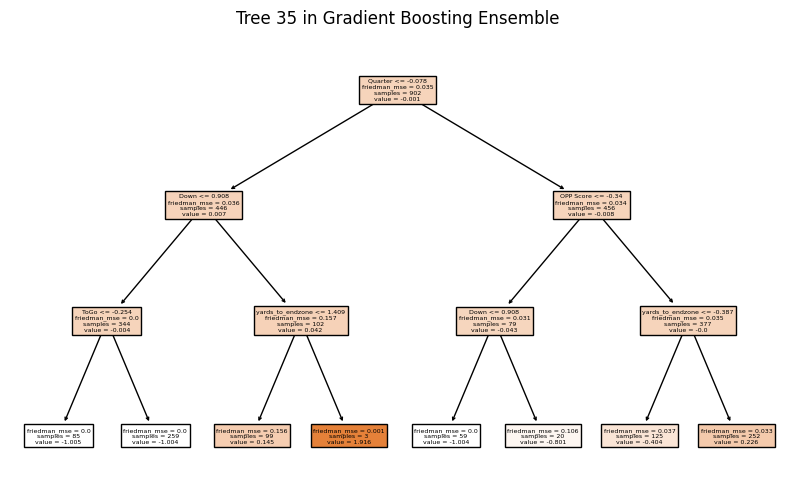

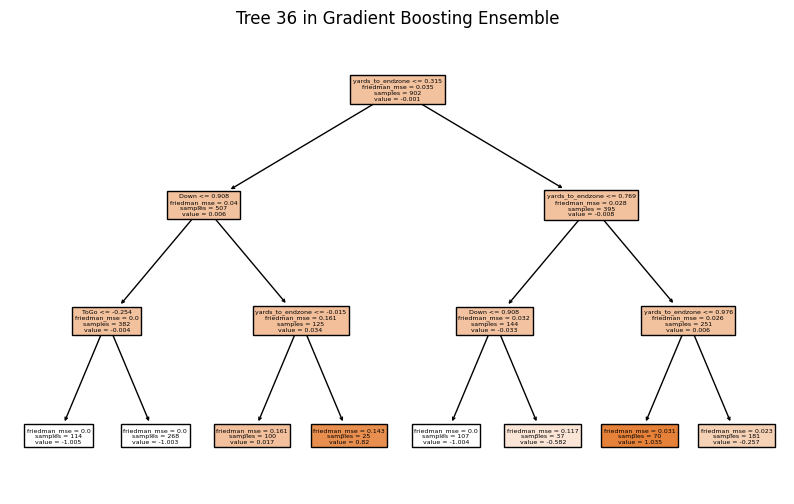

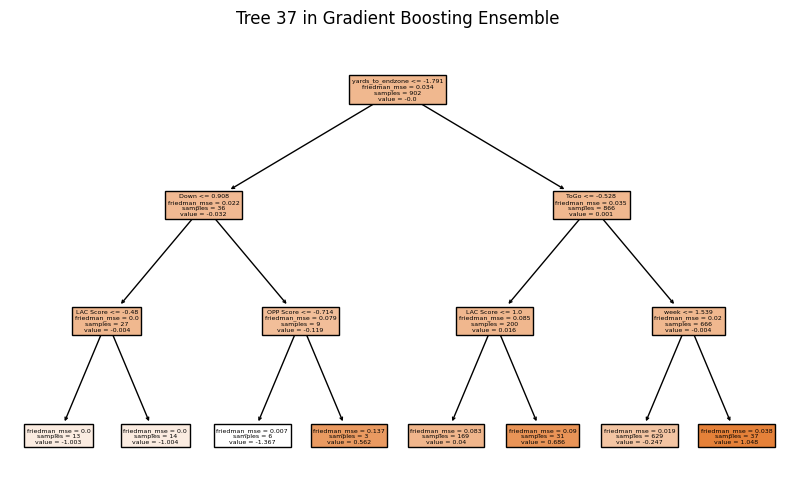

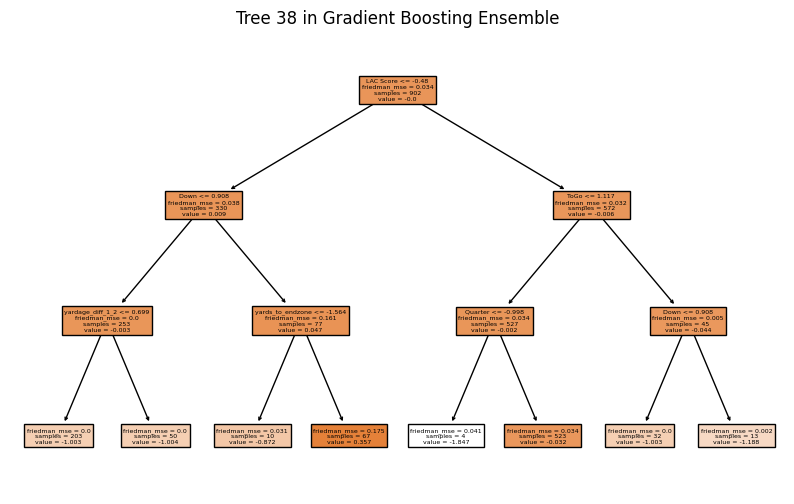

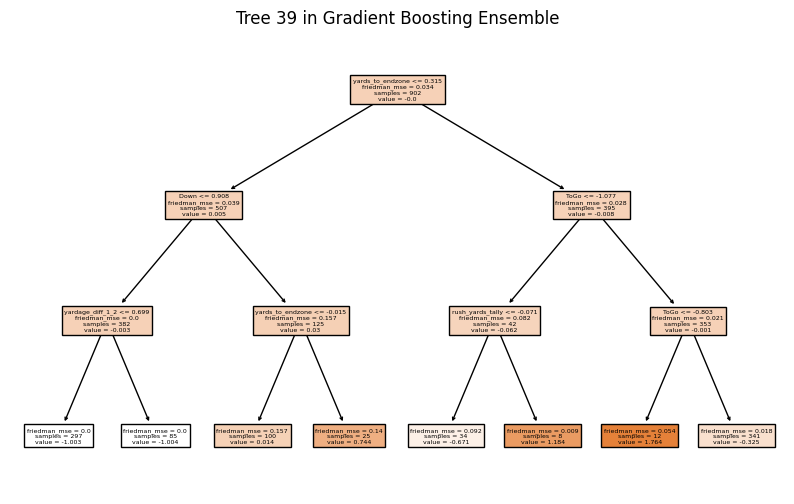

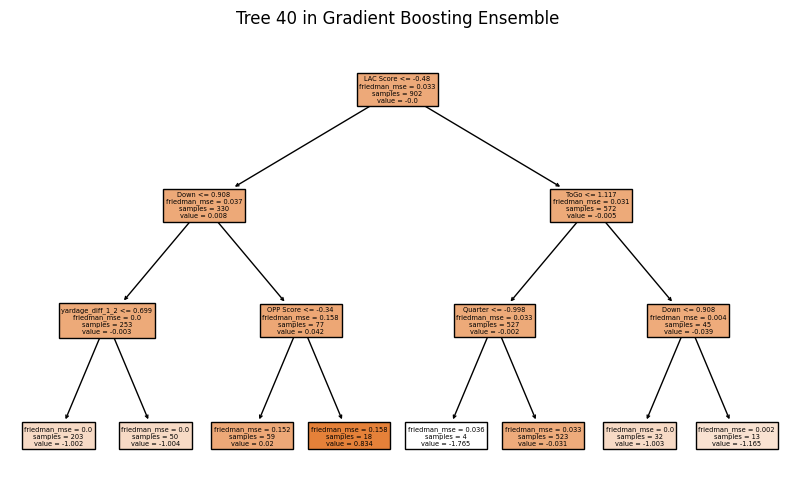

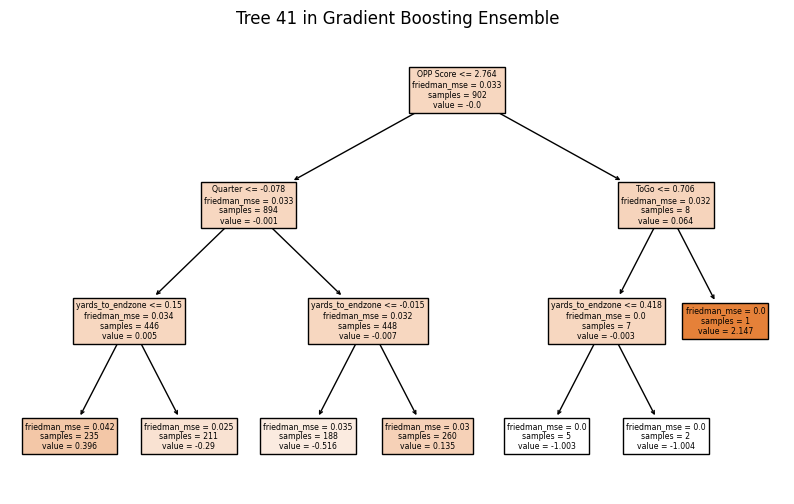

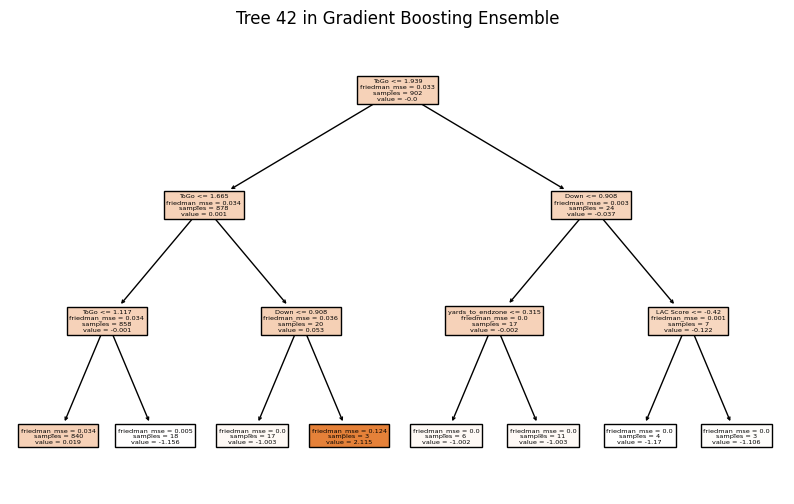

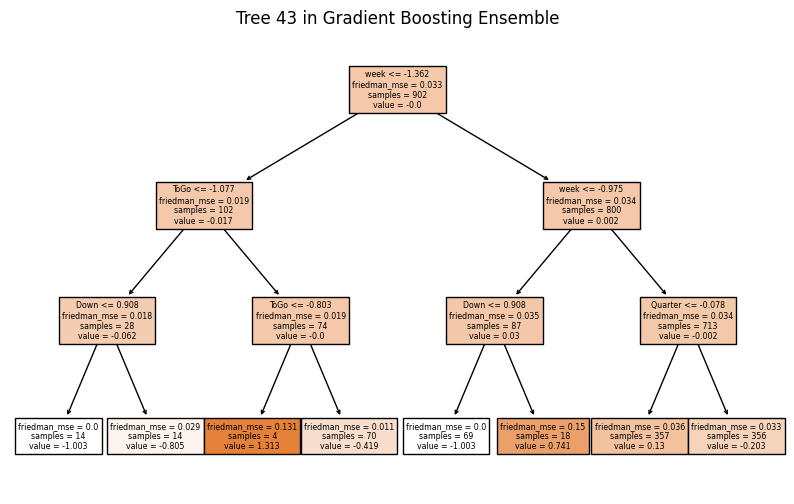

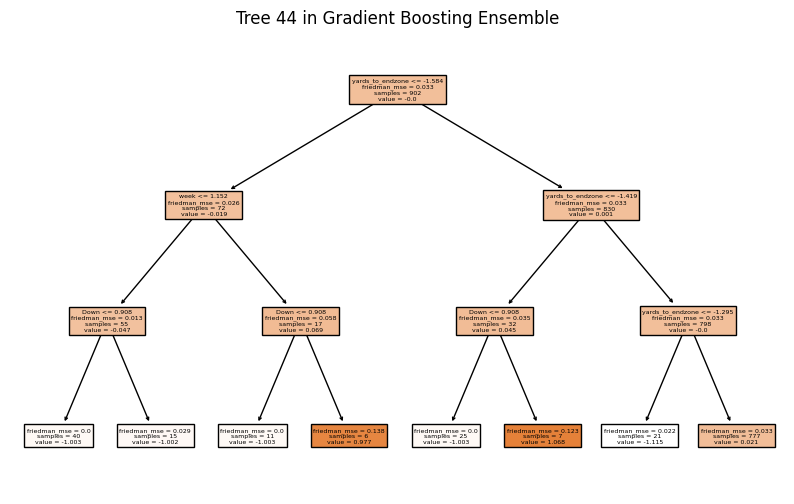

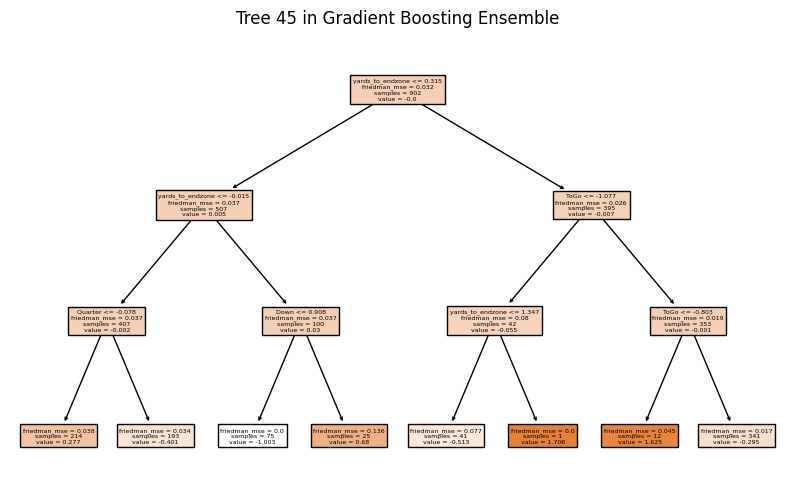

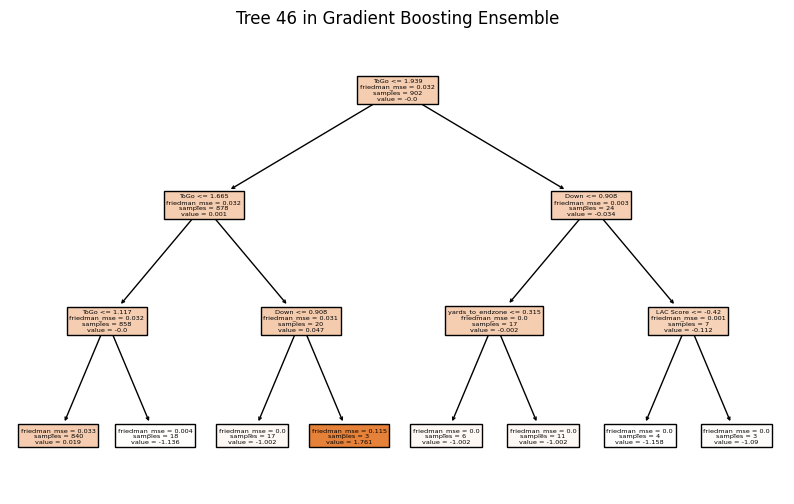

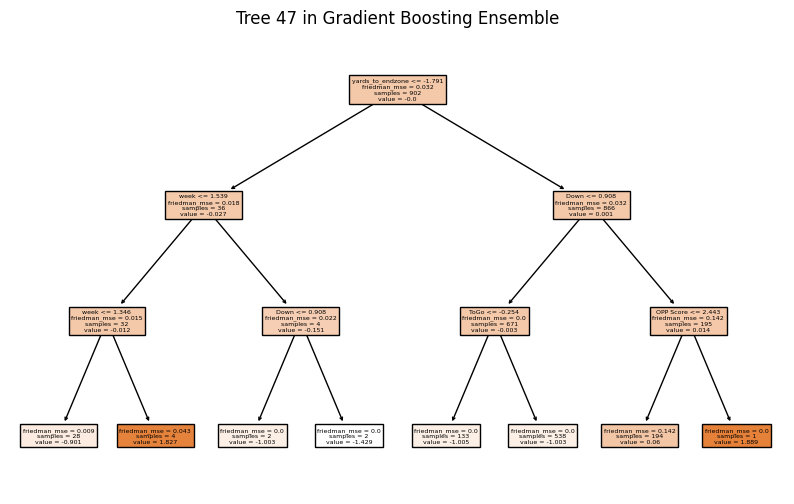

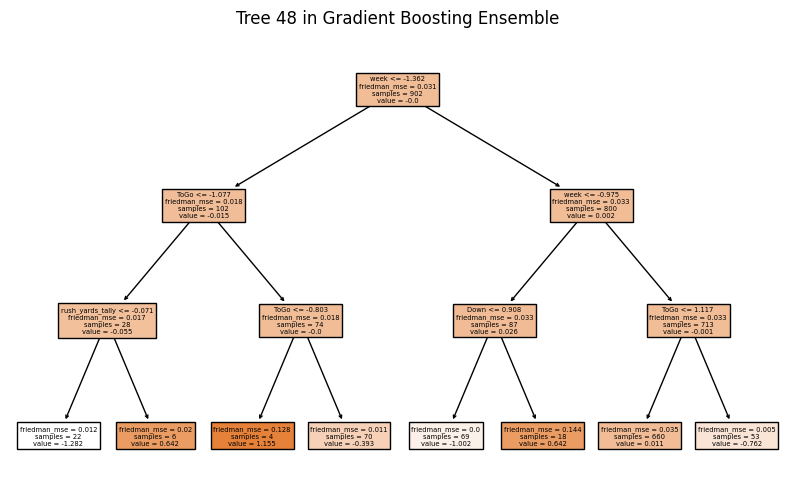

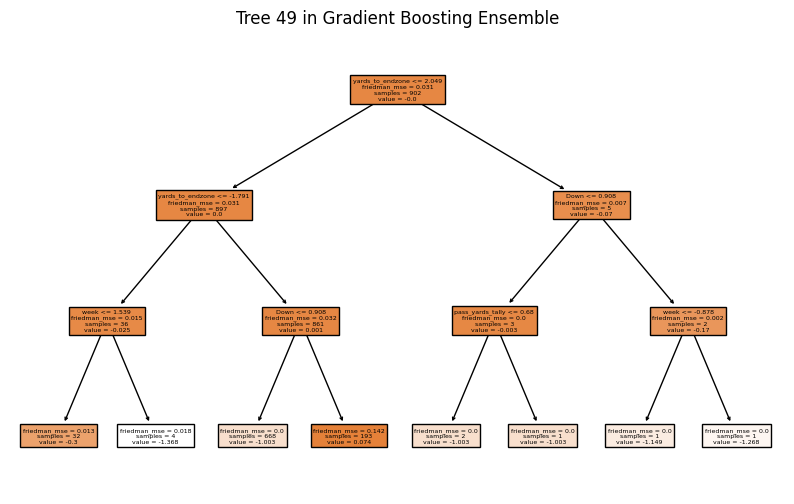

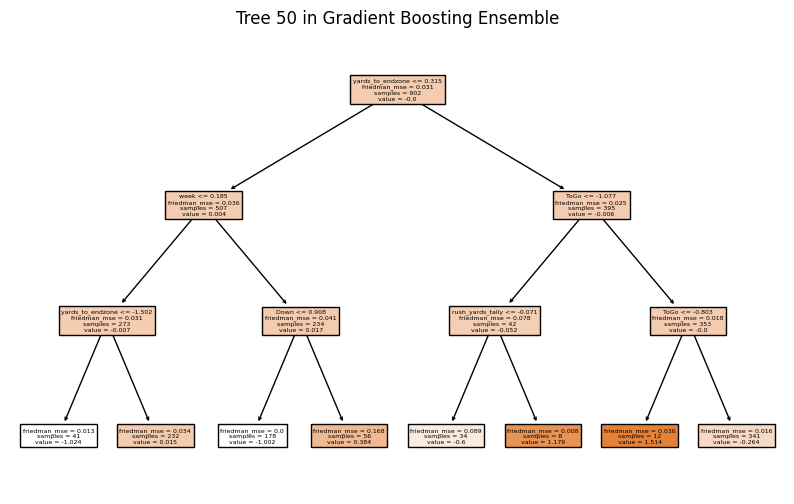

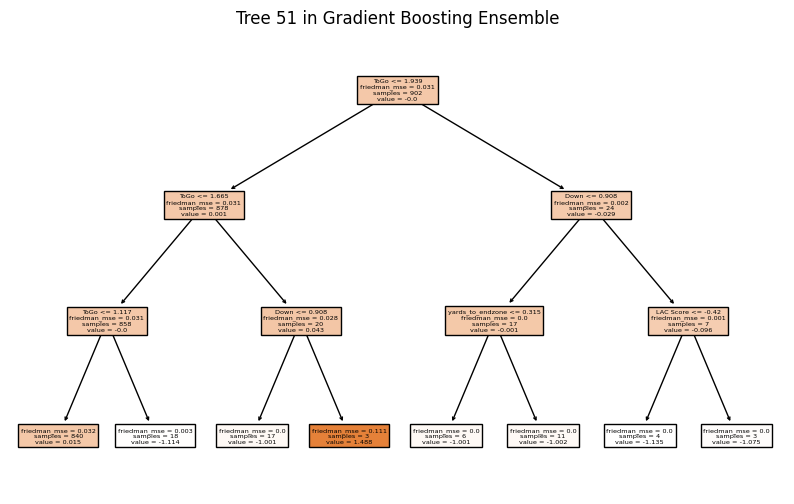

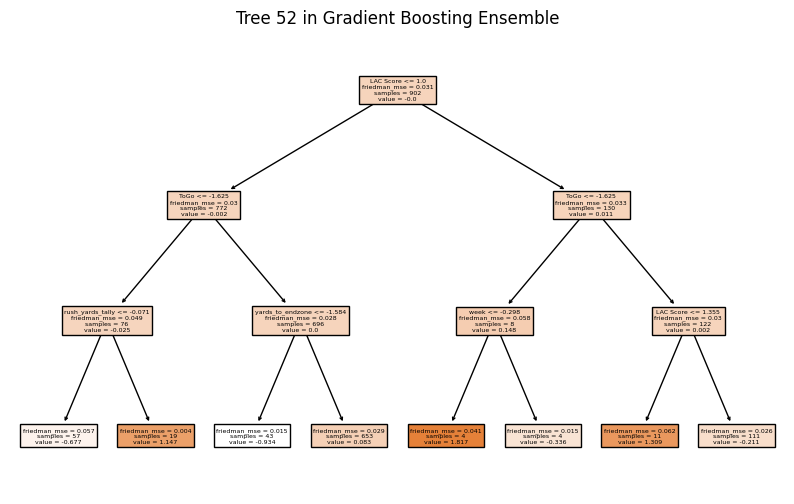

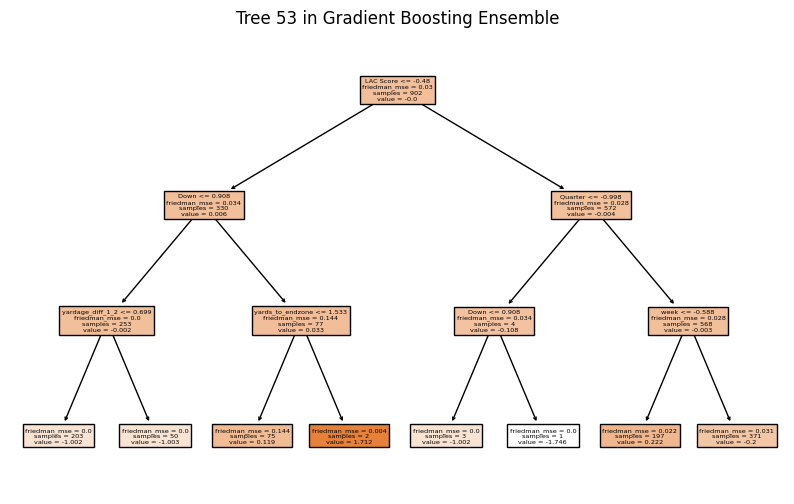

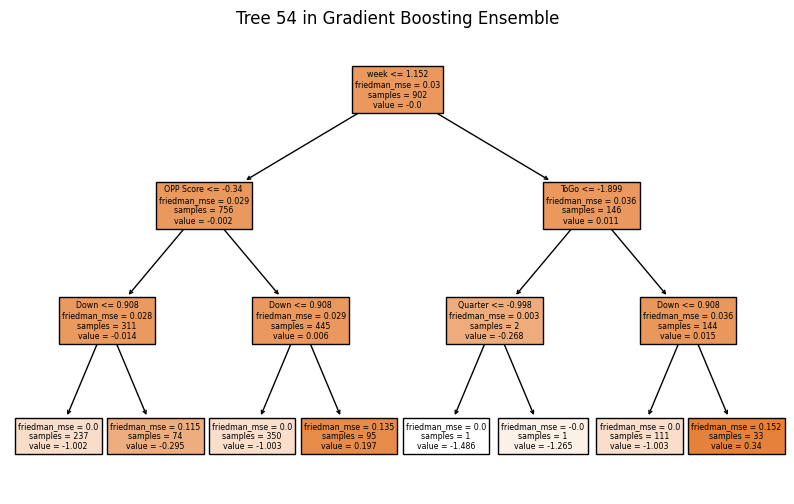

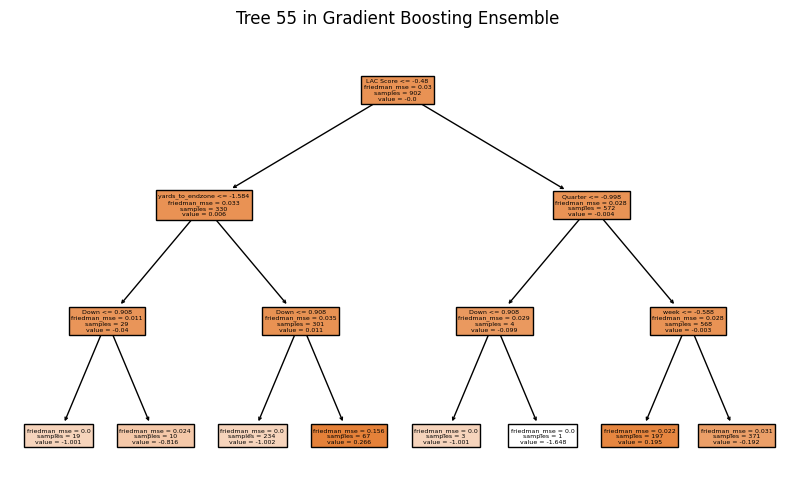

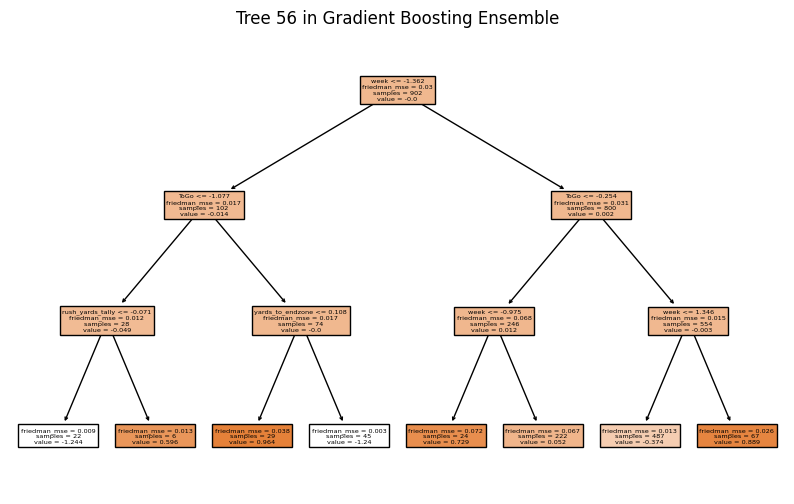

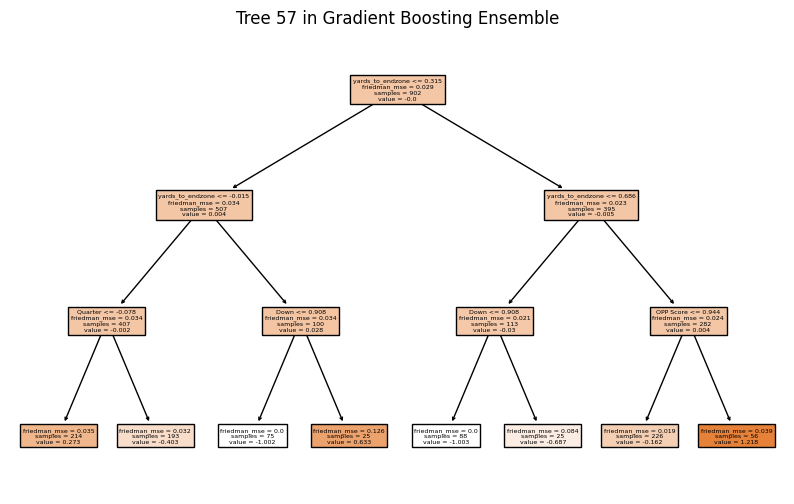

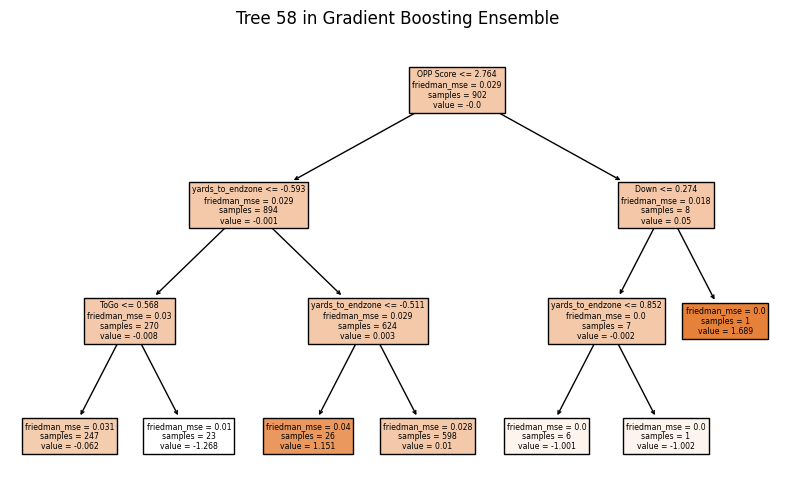

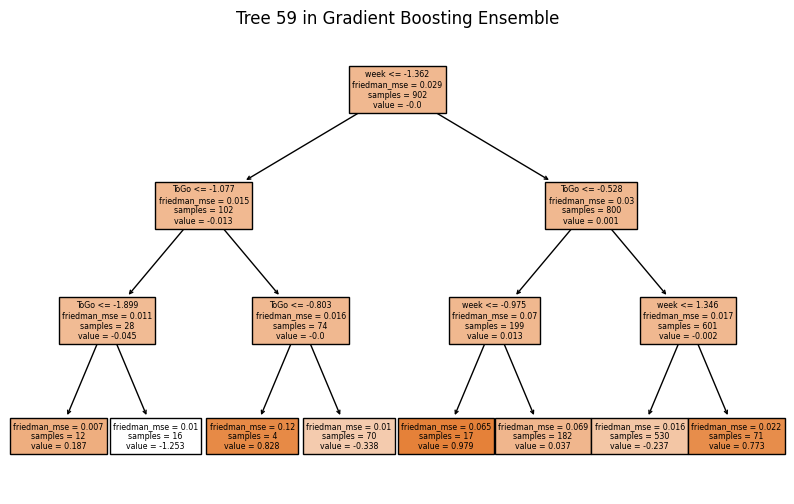

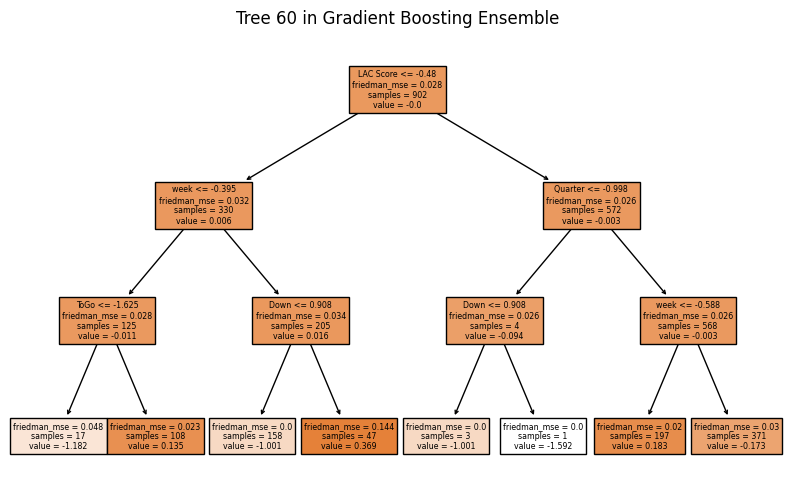

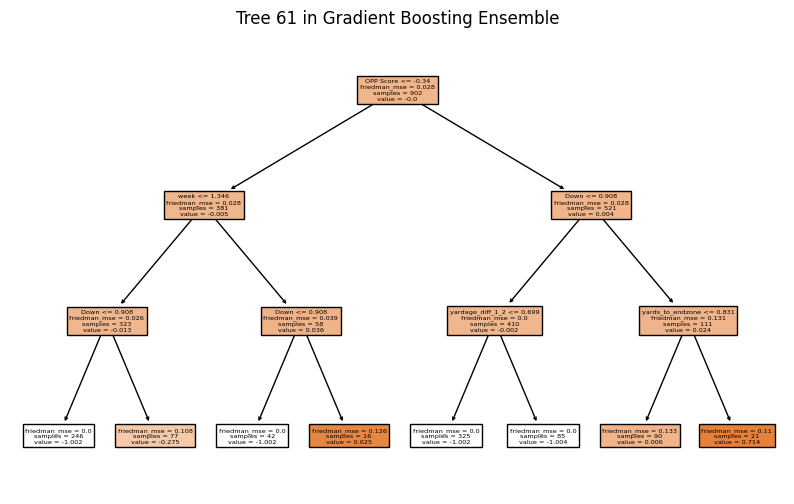

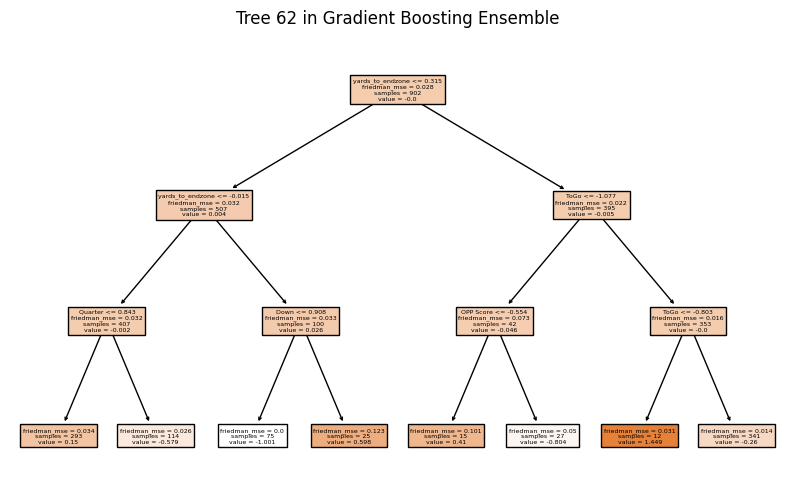

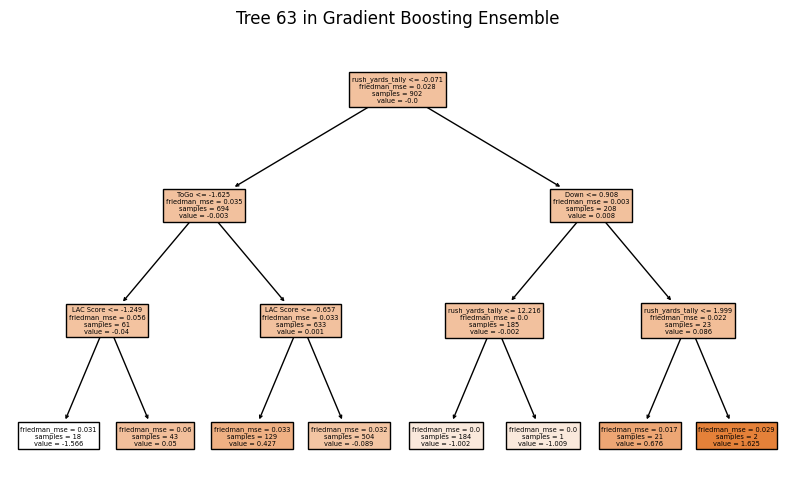

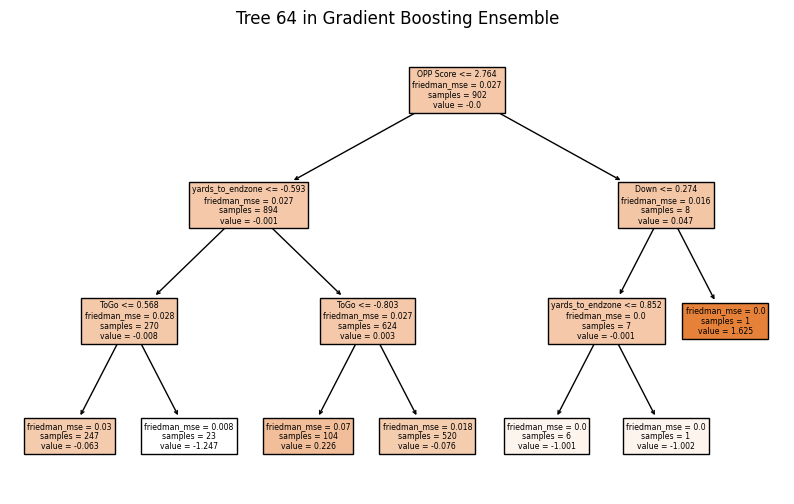

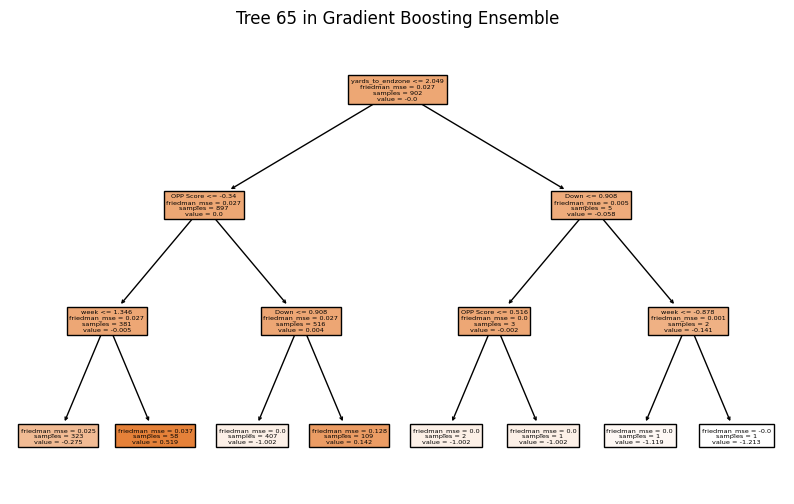

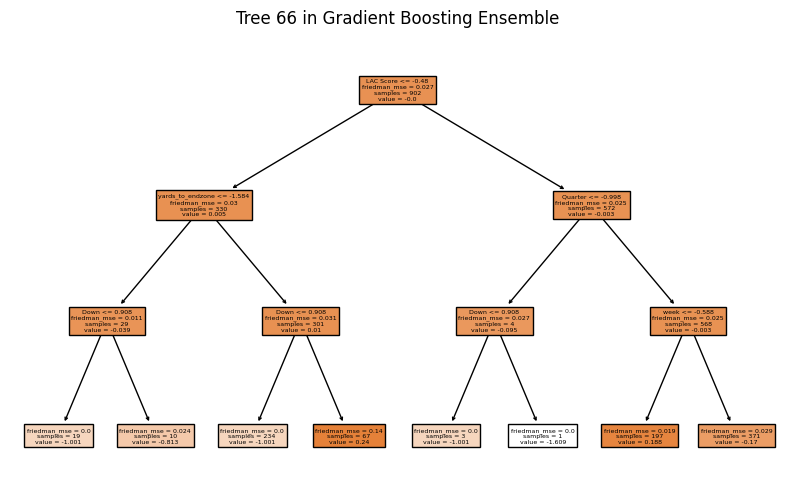

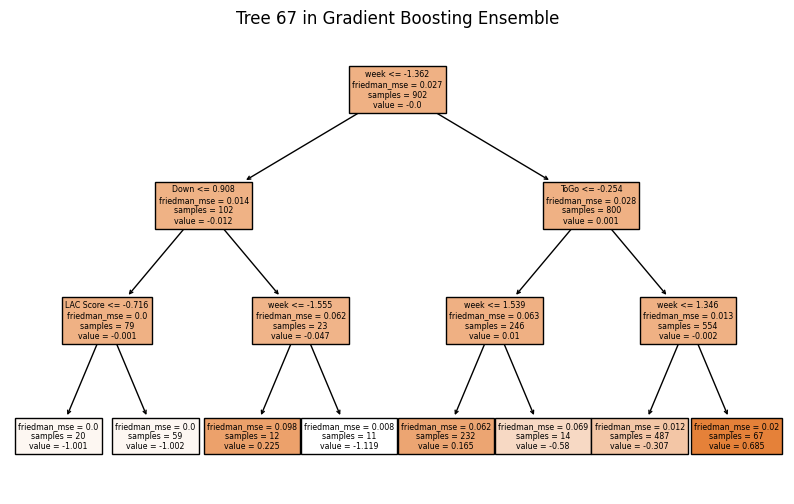

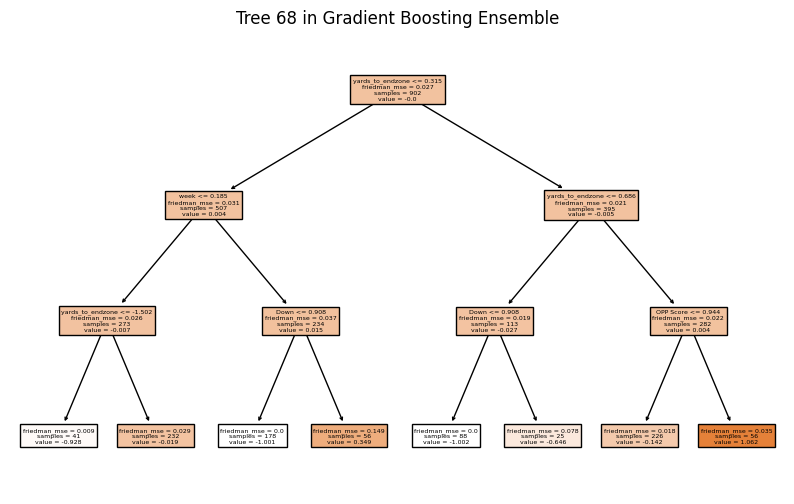

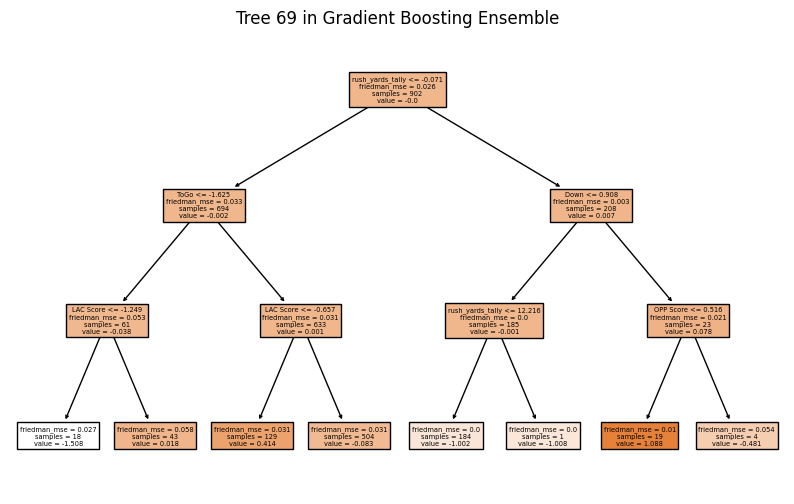

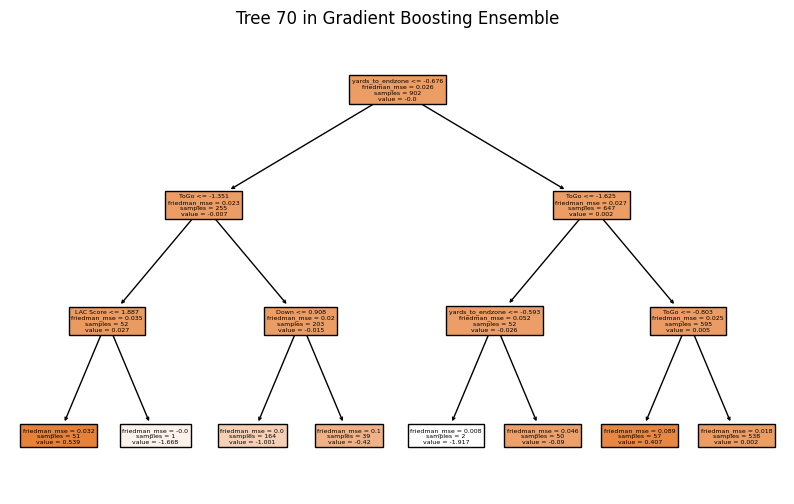

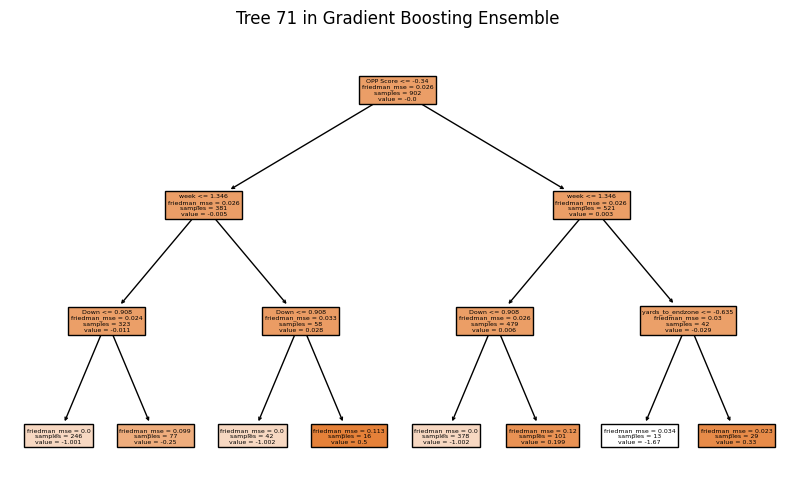

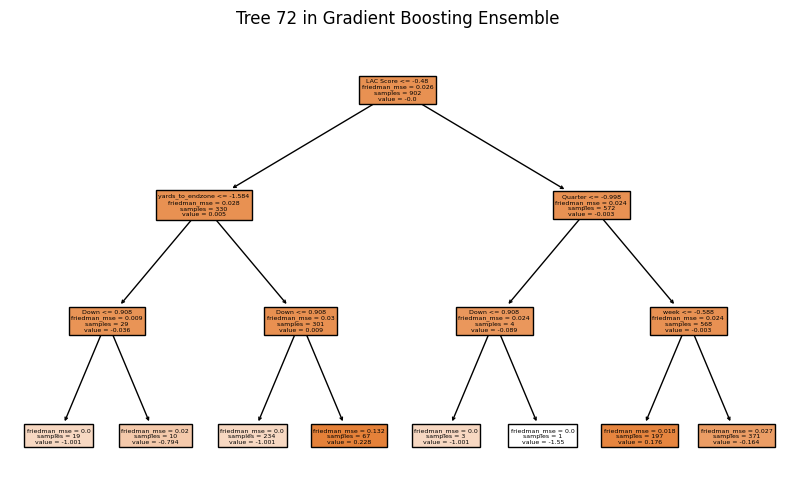

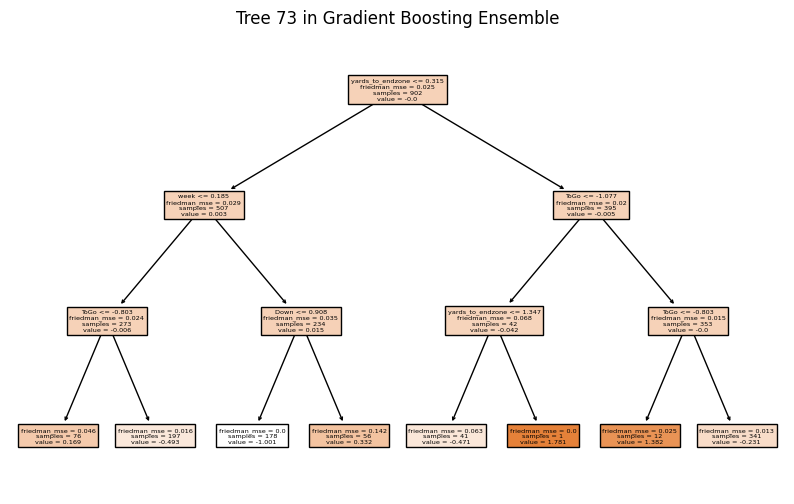

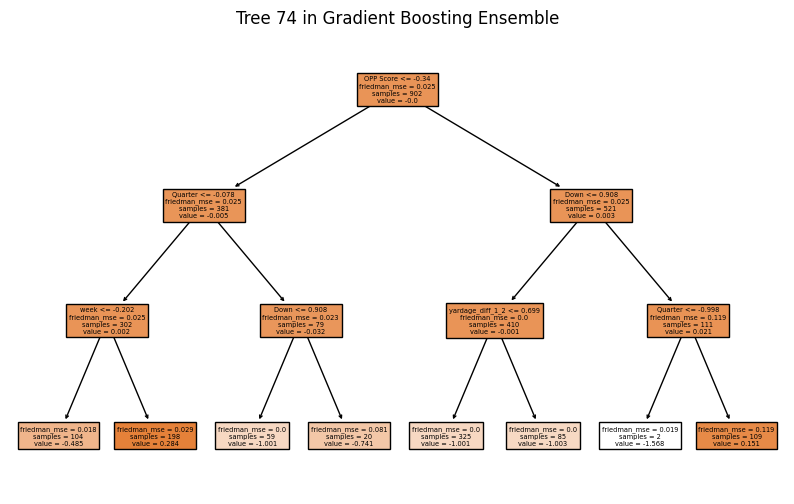

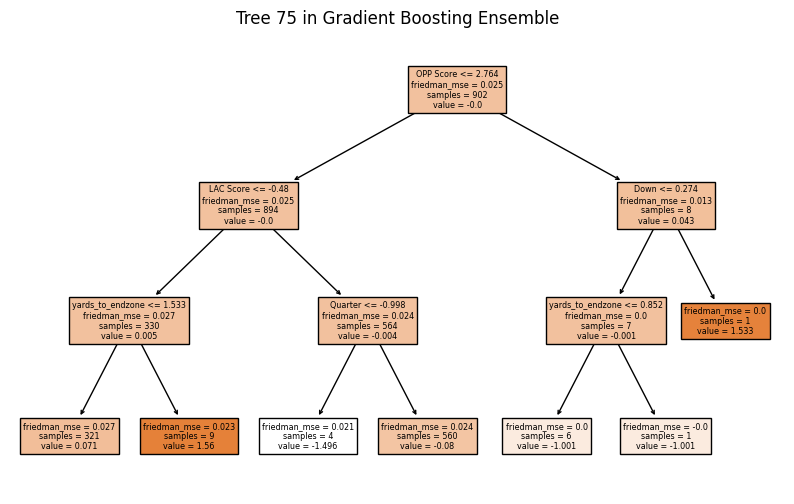

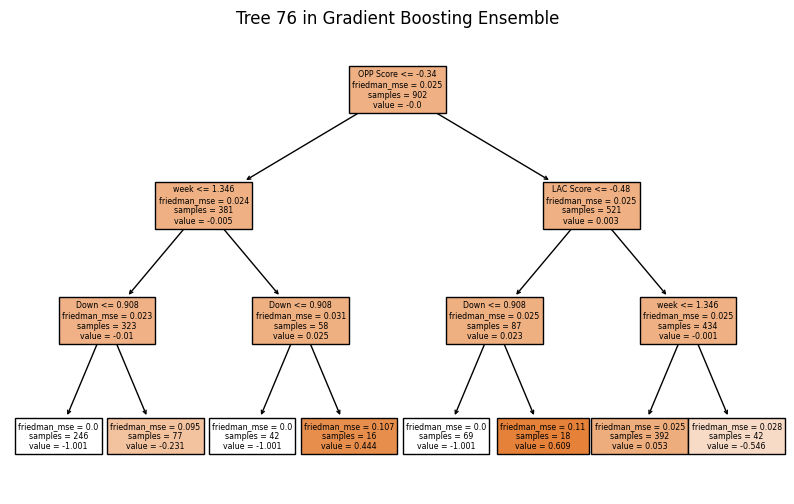

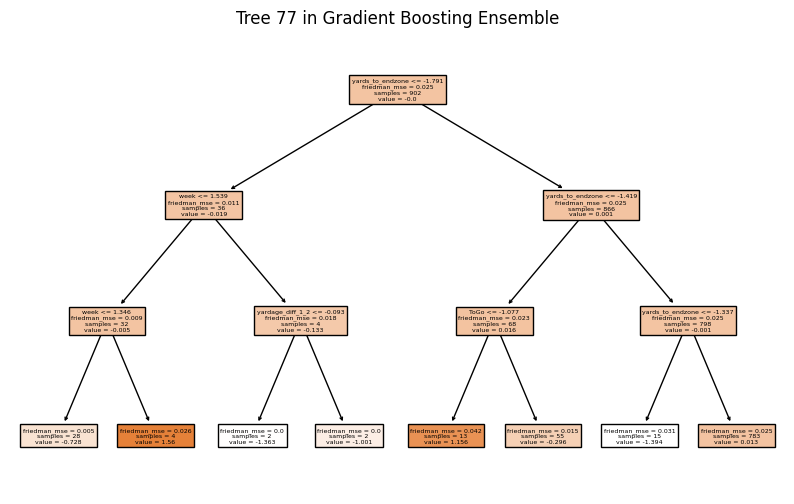

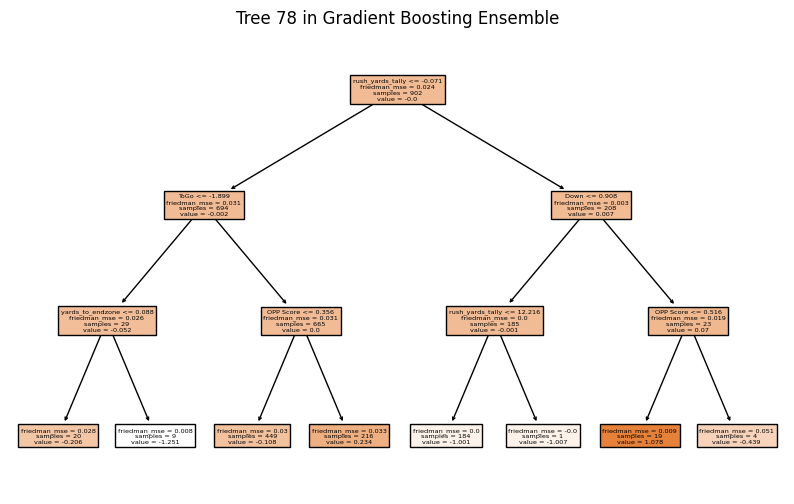

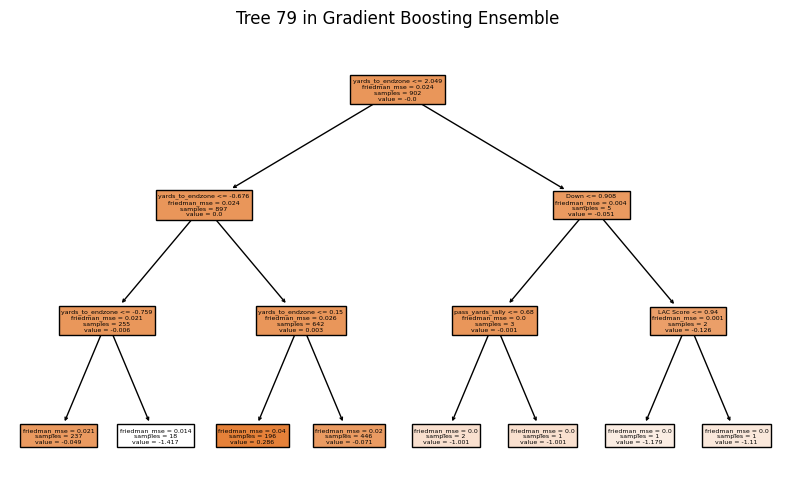

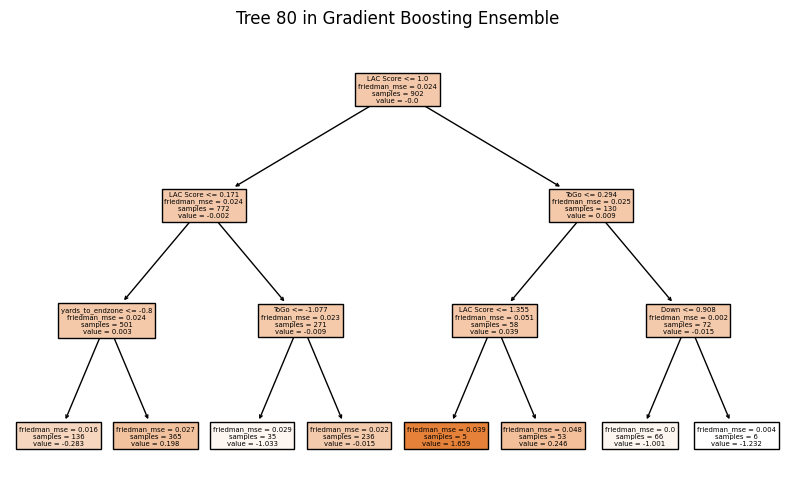

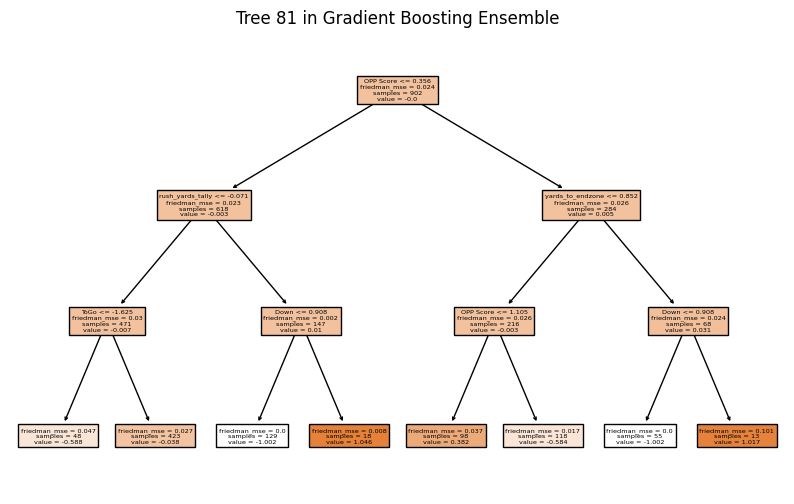

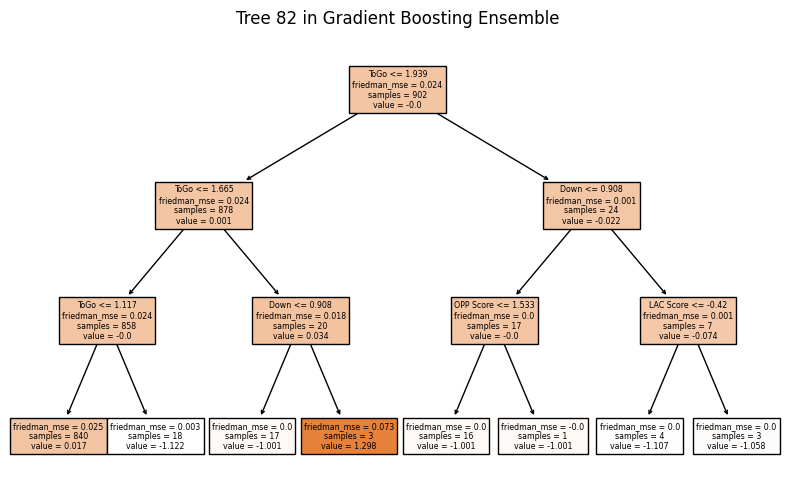

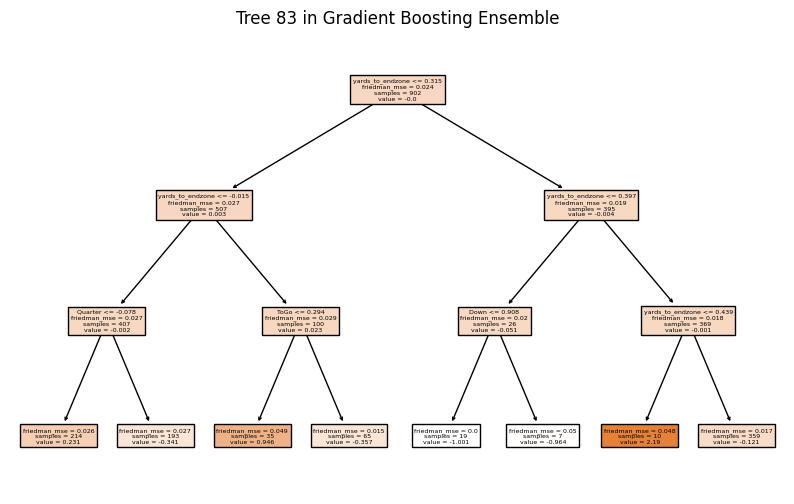

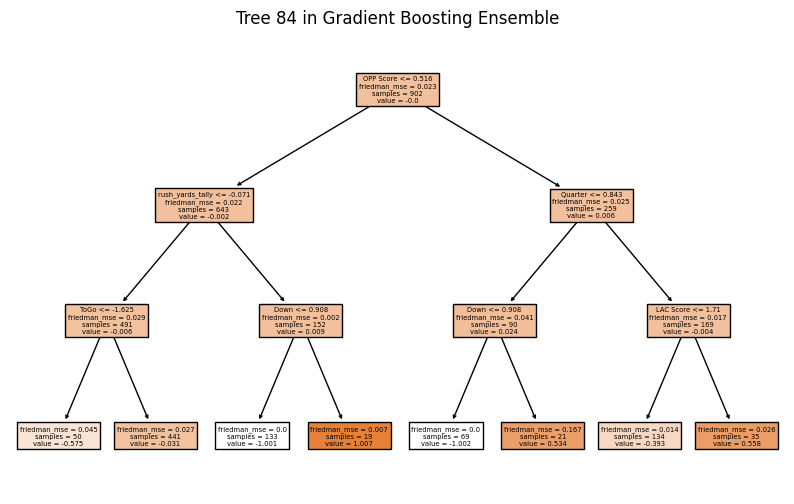

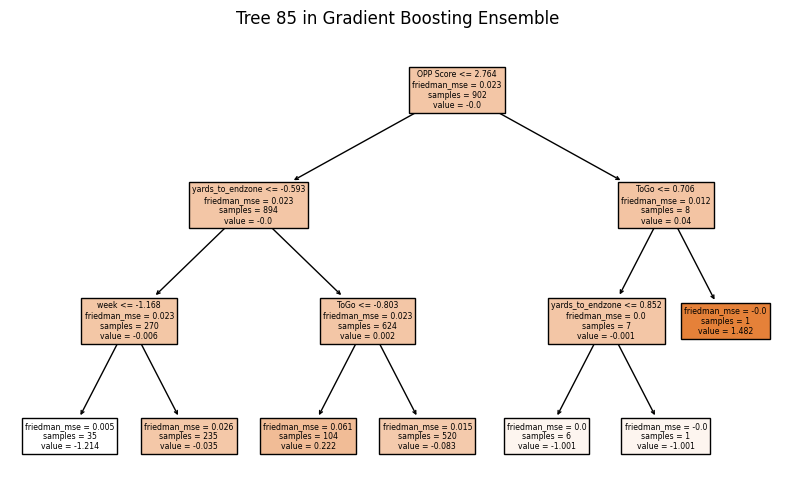

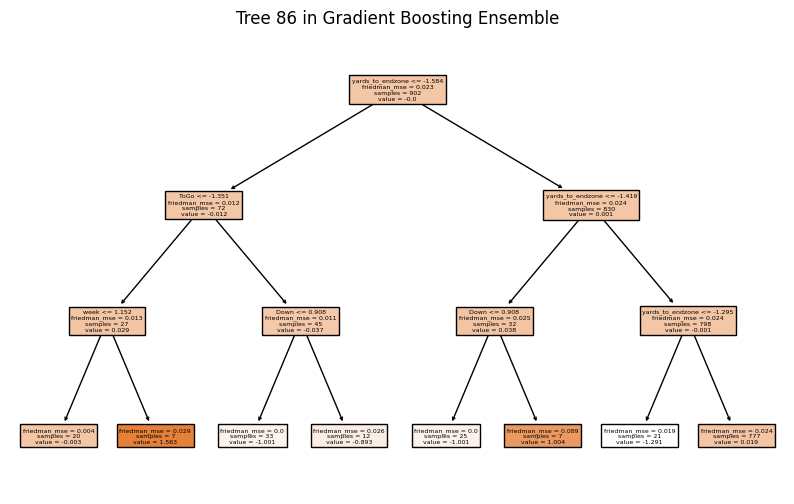

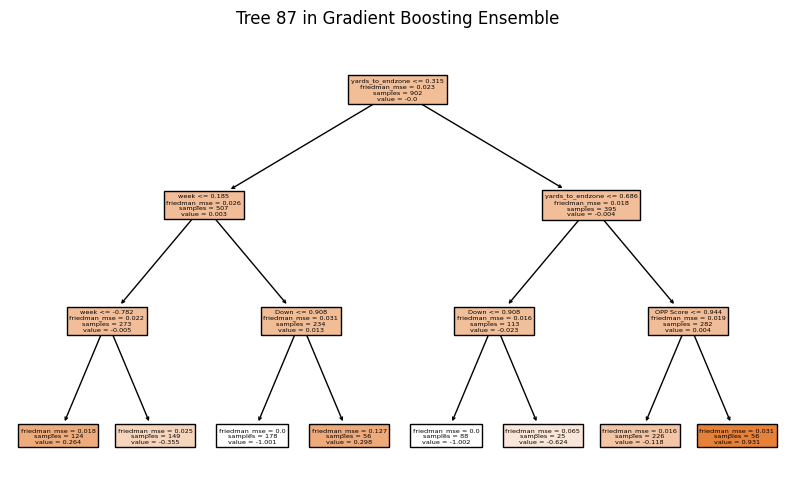

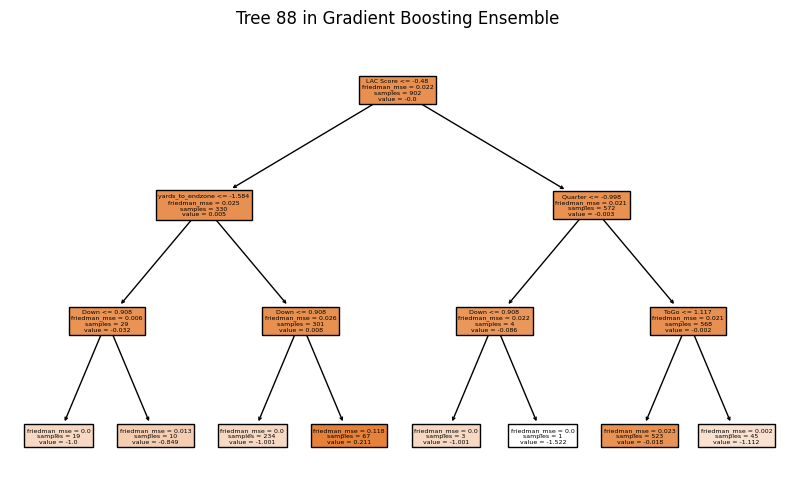

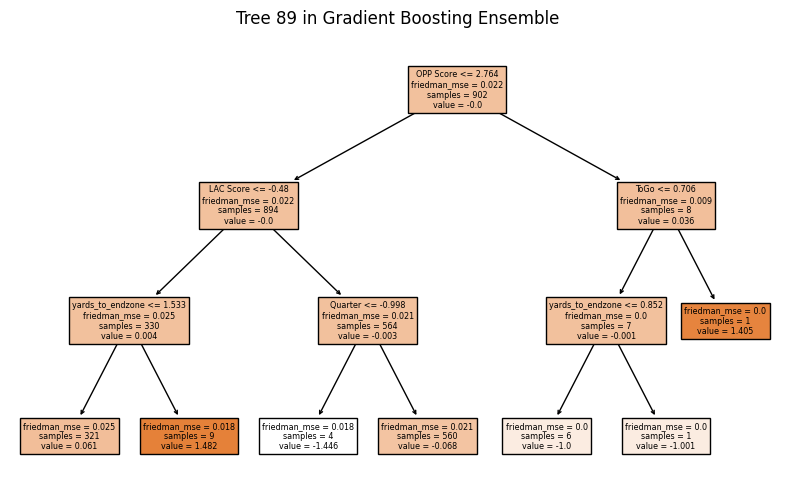

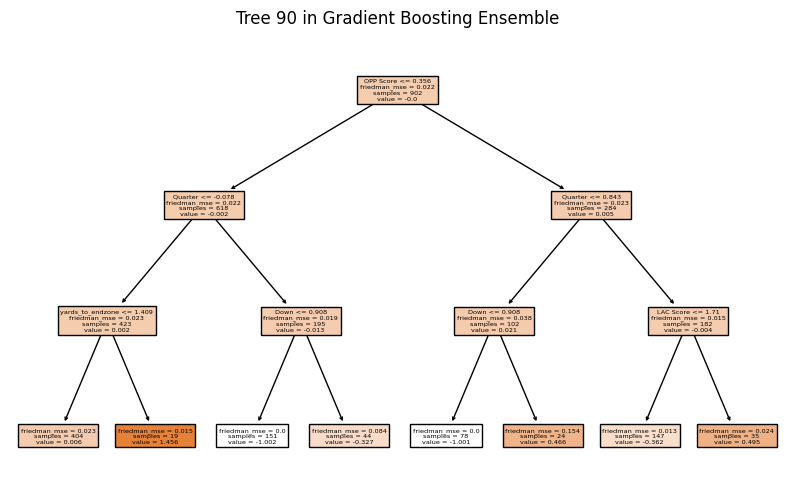

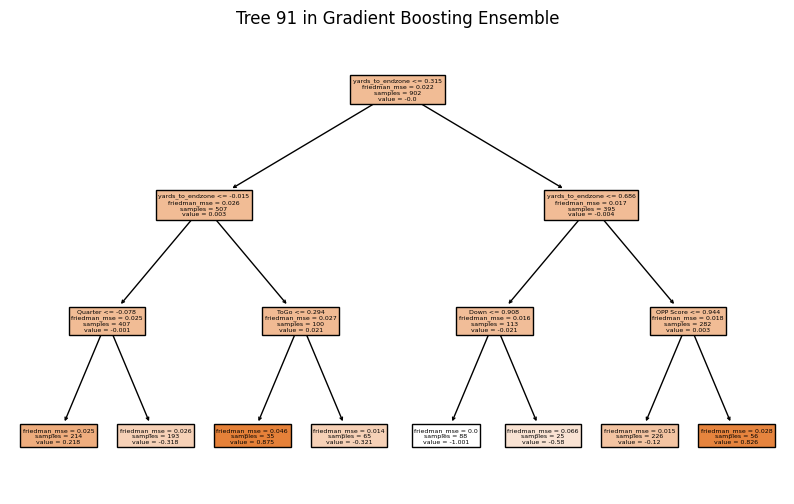

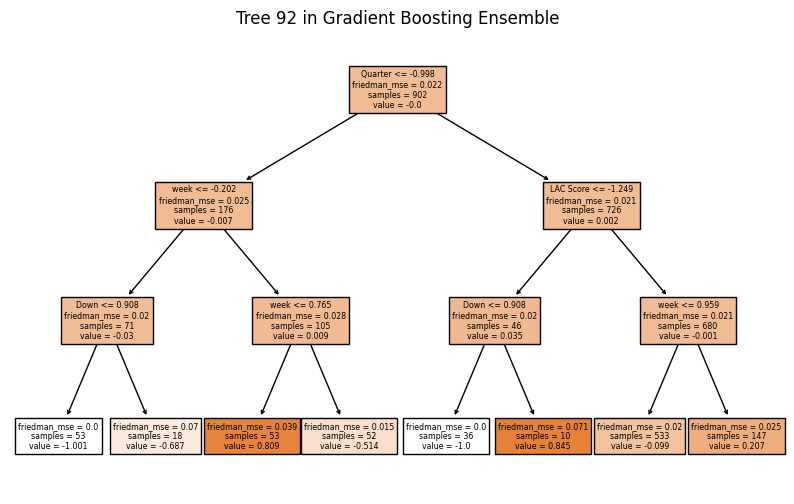

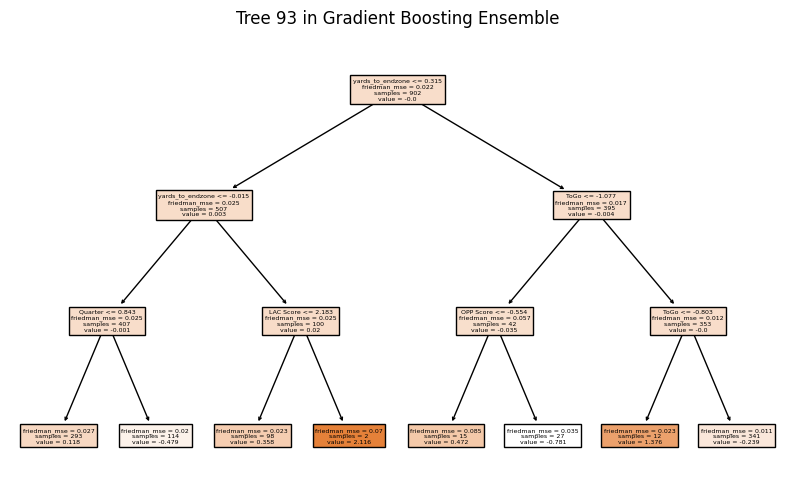

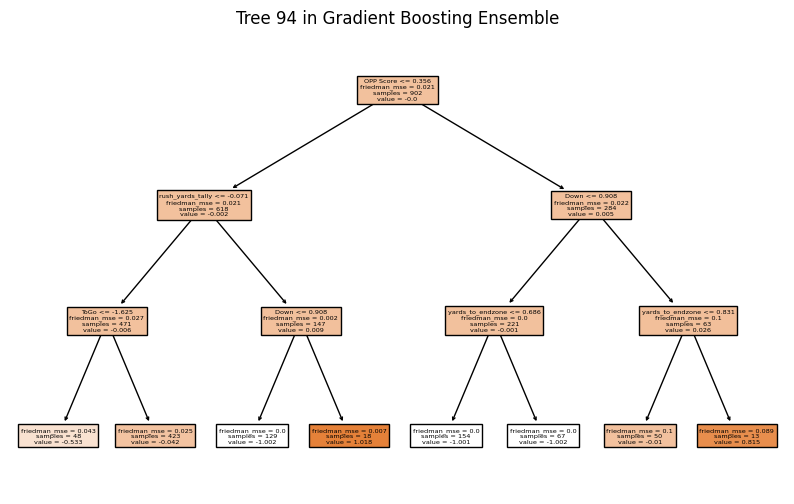

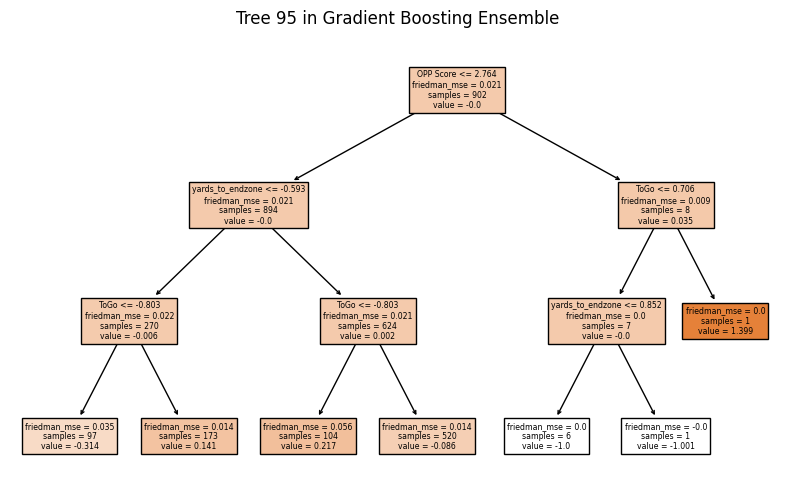

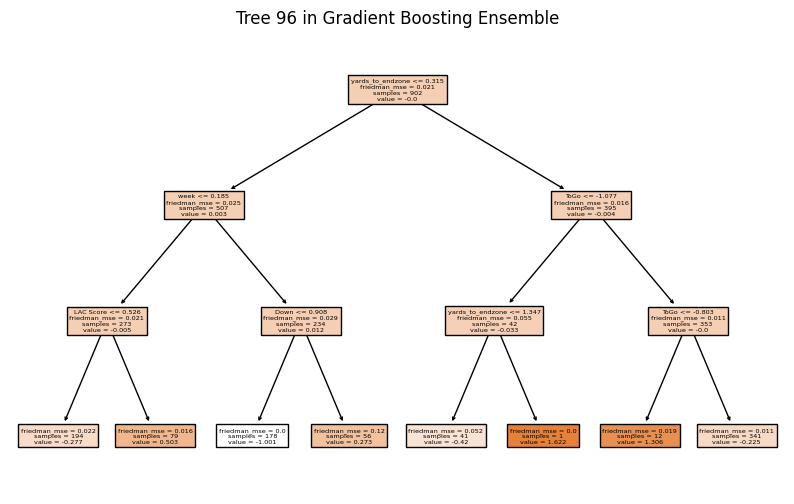

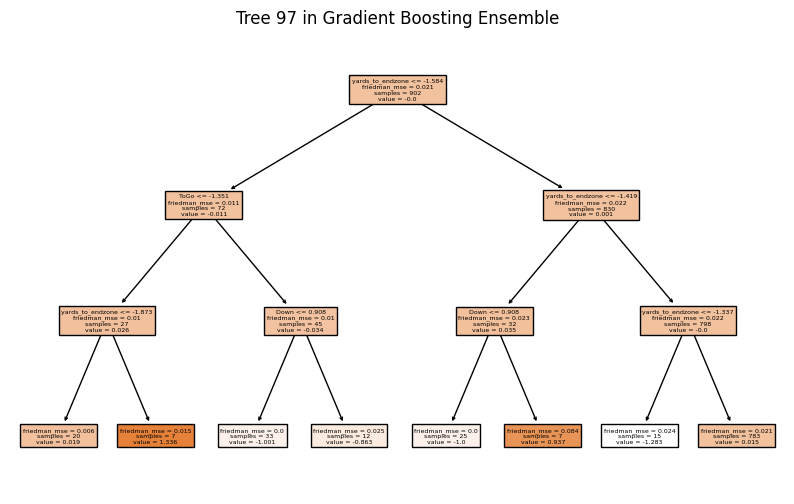

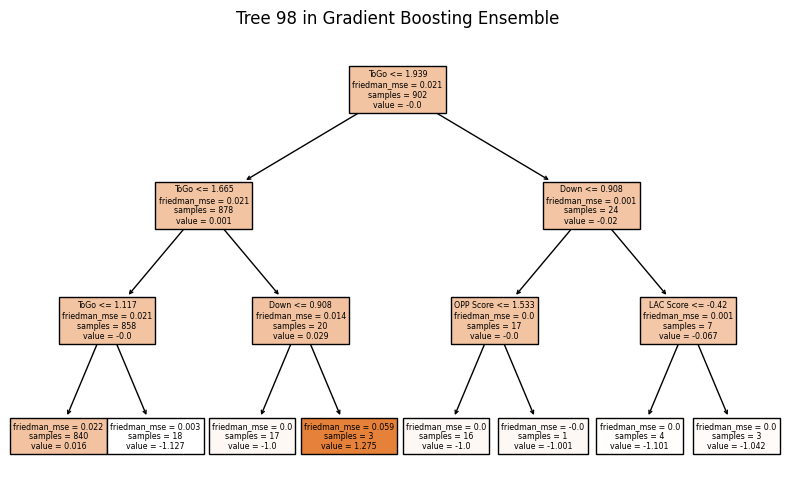

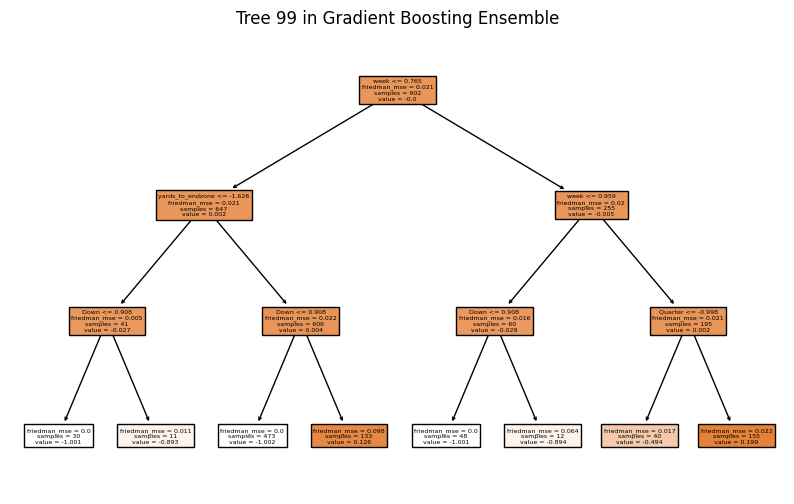

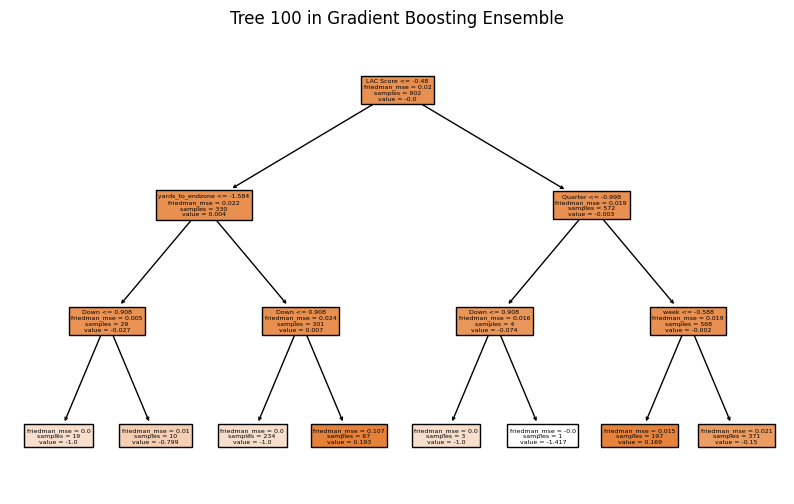

In [37]:
# Visualize individual trees in the ensemble
for i, tree in enumerate(gb_model.estimators_):
    plt.figure(figsize=(10, 6))
    plot_tree(tree[0], feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f"Tree {i+1} in Gradient Boosting Ensemble")
    plt.show()   